In [1]:
from ReadTobiiGlasses import ReadTobiiGlasses

import re

import numpy

import scipy
import scipy.stats

import pandas
from pandas import DataFrame

%matplotlib inline
#%matplotlib tk
#%gui
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
matplotlib.style.use('bmh') #bmh, ggplot, seaborn, fivethirtyeight
params = {#'font.family': 'arial',
          'figure.titleweight': 'bold',
          'figure.figsize': (6, 6),
          'figure.dpi': 300,
          #'savefig.dpi': 300,
          'axes.titlesize': 'medium',
          'axes.titleweight': 'bold',
          'axes.labelsize': 'small',
          #'axes.labelweight': 'normal',
          #'axes.facecolor': '#E8DDCB',
          'axes.grid': True,
          'axes.grid.which': 'major',    #both, major
          'axes.axisbelow': True,    #line, False
          #'grid.linewidth': 0.5,
          #'grid.alpha': 0.8,
          'xtick.labelsize': 'x-small',
          'ytick.labelsize': 'x-small',
          'xtick.direction': 'out',
          'ytick.direction': 'out',
          'ytick.left': True,
          'xtick.bottom': True,
          'ytick.minor.left': True,
          'xtick.minor.bottom': True,
          'xtick.minor.visible': True,
          'ytick.minor.visible': True,
          'legend.fontsize': 'xx-small',
          'legend.facecolor': 'grey',
          'hist.bins': 20,
          'boxplot.vertical': True,
          'boxplot.notch': True,
          'boxplot.showmeans': False,
          'boxplot.showcaps': True,
          'boxplot.showfliers': False,
          'boxplot.meanline': False,
          'boxplot.patchartist': True,
          'boxplot.boxprops.linewidth': 1,
          'boxplot.flierprops.linewidth': 0.25,
          'boxplot.flierprops.markersize': 4,
          'boxplot.flierprops.markerfacecolor': 'white',
          'boxplot.whiskerprops.linewidth': 1,
          'boxplot.capprops.linewidth': 1,
          'boxplot.medianprops.linewidth': 0.5,
          'boxplot.meanprops.linewidth': 0.5,
          'errorbar.capsize': 9
          }
pylab.rcParams.update(params)

import seaborn as sns
sns.set_style({#'axes.axisbelow': True,
               #'axes.edgecolor': '.8',
               #'axes.facecolor': 'white',
               'axes.grid': True,
               #'axes.labelcolor': '.15',
               'axes.spines.bottom': True,
               'axes.spines.left': True,
               'axes.spines.right': True,
               'axes.spines.top': True,
               #'figure.facecolor': 'white',
               #'font.family': ['sans-serif'],
               #'grid.color': '.8',
               #'grid.linestyle': '-',
               'image.cmap': 'rocket',
               #'lines.solid_capstyle': 'round',
               #'patch.edgecolor': 'w',
               #'patch.force_edgecolor': True,
               #'text.color': '.15',
               'xtick.bottom': True,
               #'xtick.color': '.15',
               'xtick.direction': 'out',
               'xtick.top': False,
               #'ytick.color': '.15',
               'ytick.direction': 'out',
               'ytick.left': True,
               'ytick.right': False})

import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
py.init_notebook_mode(connected=True)

In [2]:
print('Loading main program. Please wait...')
rtg = ReadTobiiGlasses(gui=False)
rtg.settingsReader.select(file='g:/projects/multidiscourse/doc/manu_voc_stats-Alla-2018.10.25/export_2018-11-16 09_30_04_idded2/Settings_manu-voc_idded2.xml')
rtg.dataReader.read(rtg.settingsReader, rtg.multiData)
print('Ready.')

Loading main program. Please wait...
Ready.


In [7]:
#print('Calling statistics. Please wait...')
print('TIP: You can check the console of the main program to monitor the progress.')
#rtg.stats.descriptive(rtg.multiData, dataExporter=rtg.dataExporter)

G:\projects\multidiscourse\scripts\readTobiiGlasses\src\stats\Stats.py:1029: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



In [3]:
#SPECIAL STATISTICS
#print('Special statistics: manu-voc-tempo requested.')
data = rtg.multiData.getChannelById('manu-voc-tempo', 'all')
dataEDU=data.loc[data['EventType']=='EDU']
dataFRG=data.loc[data['EventType']=='FRG']

EDUgrouped = dataEDU.groupby(['Interval', 'Id'])['Tempo']
EDUgroupedN = [list(EDUgrouped)[1][1], list(EDUgrouped)[4][1]]
EDUgroupedR = [list(EDUgrouped)[5][1], list(EDUgrouped)[6][1]]
#
FRGgrouped = dataFRG.groupby(['Interval', 'Id'])['Tempo']
FRGgroupedN = [list(FRGgrouped)[1][1], list(FRGgrouped)[4][1]]
FRGgroupedR = [list(FRGgrouped)[5][1], list(FRGgrouped)[6][1]]

In [7]:
#dataGesture=data.loc[data['EventType']=='Gesture']
#dataGesture['PMeasure']

22       0.624324
26       1.000000
28       1.000000
30       1.000000
33       0.325843
45       0.604762
49       1.000000
52       1.000000
58       1.000000
59       0.562222
64       1.000000
65       1.000000
68       0.700917
78       0.744898
83       0.963846
89       0.229630
102      0.000000
119      1.000000
121      0.828767
125      0.581250
138      0.938750
142      0.658621
147      1.000000
148      0.802830
161      1.000000
170      0.560345
177      1.000000
179      0.972727
194      1.000000
196      0.840984
           ...   
11564    0.873684
11572    0.967949
11576    0.895122
11580    1.000000
11582    1.000000
11584    1.000000
11586    0.738462
11590    1.000000
11592    1.000000
11594    1.000000
11596    1.000000
11598    0.886066
11603    0.954386
11605    0.190769
11609    0.713636
11613    0.326667
11617    0.522727
11621    1.000000
11623    1.000000
11625    0.640741
11629    0.822917
11633    1.000000
11635    0.632877
11639    1.000000
11643    0

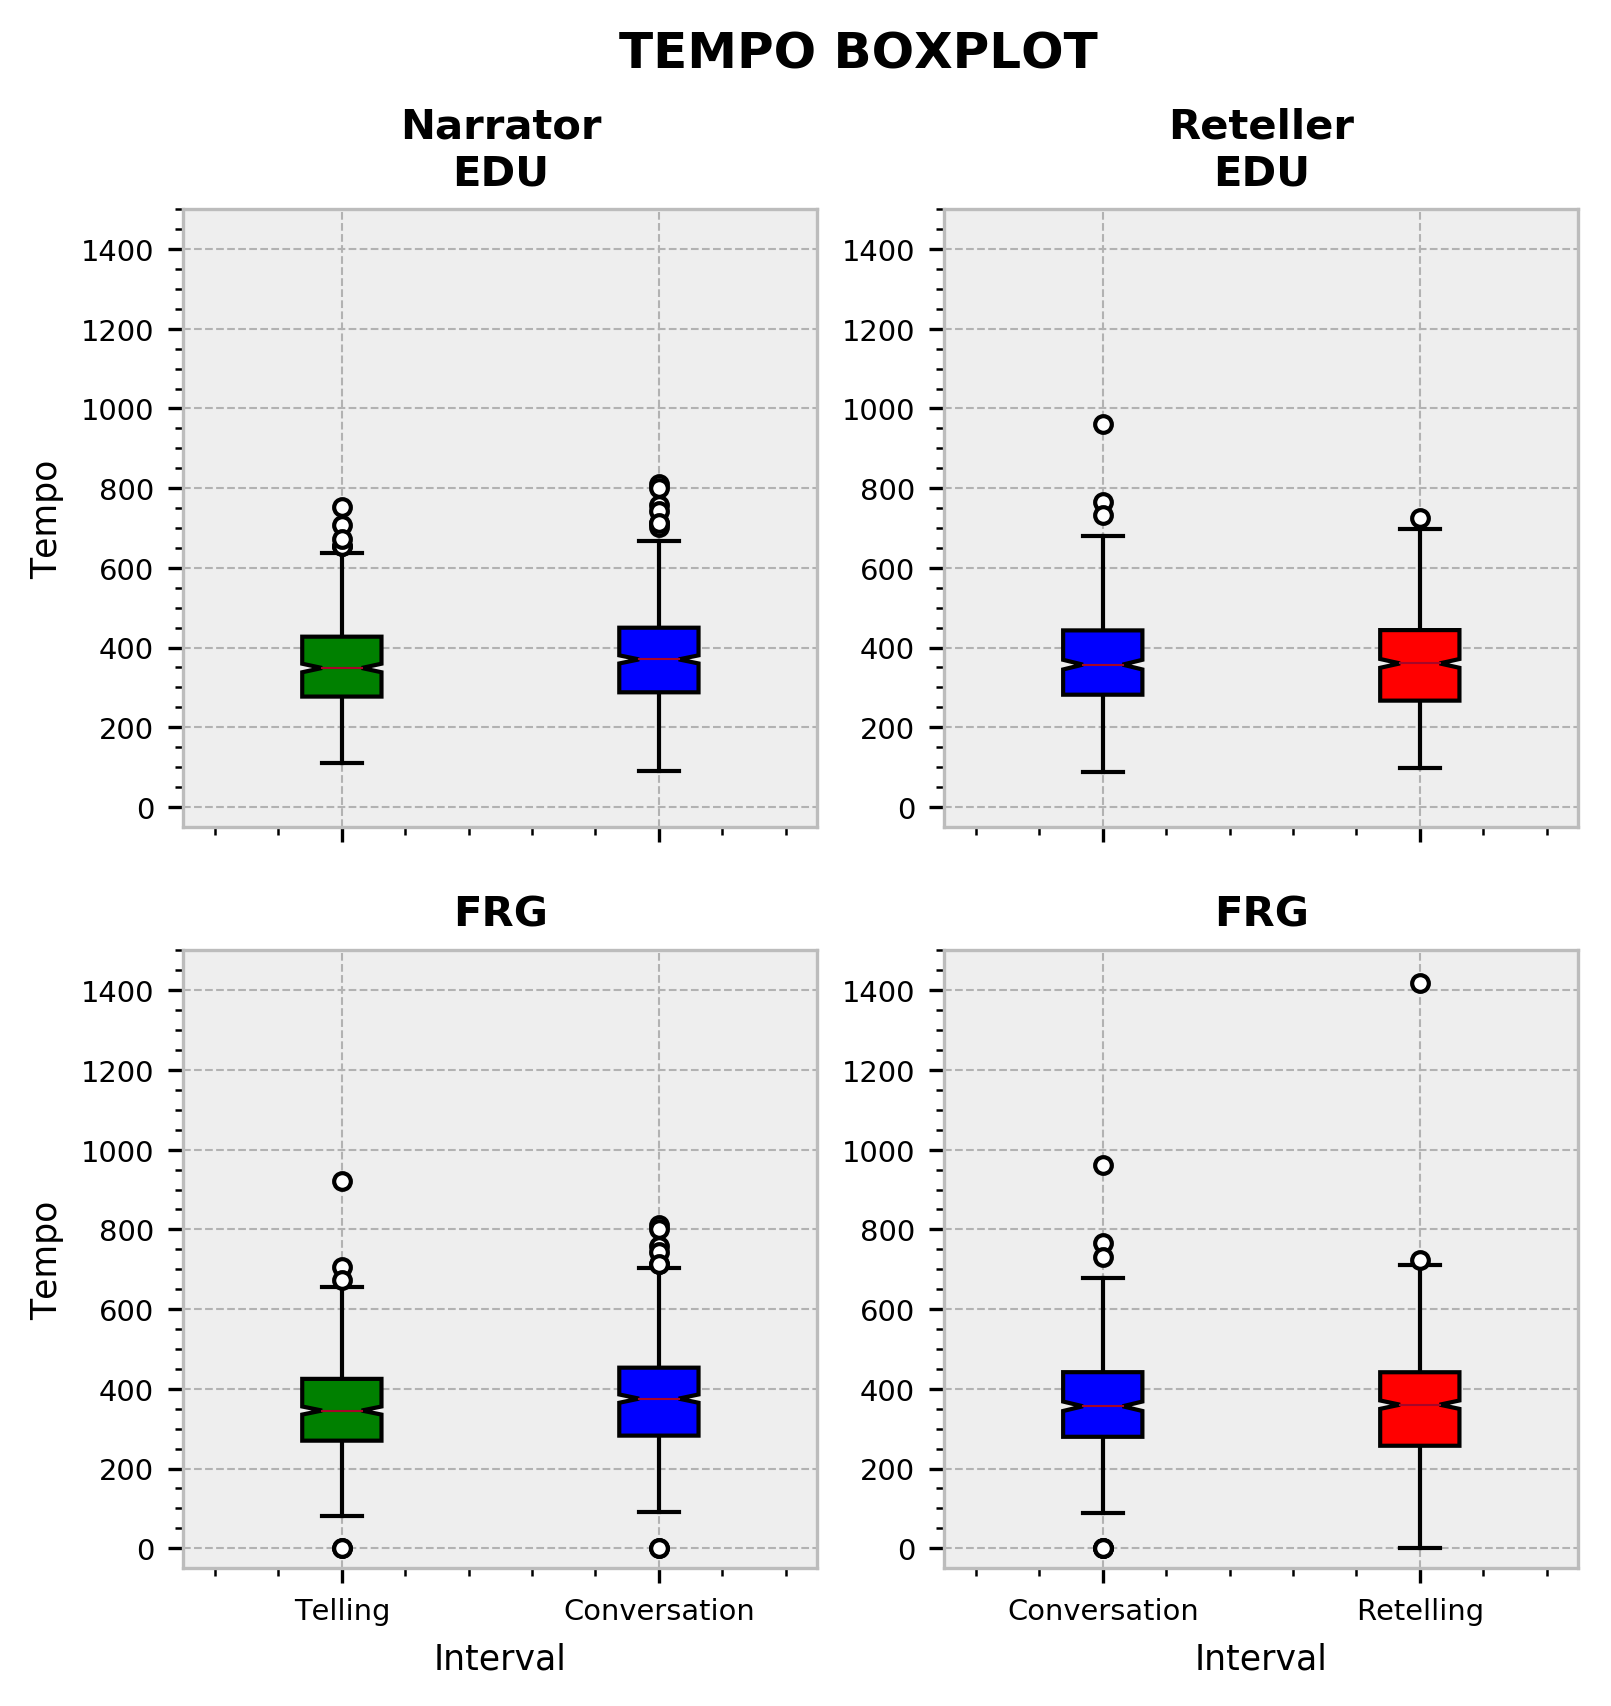

In [76]:
#boxplot
plt.subplot(221)
plt.title('Narrator\nEDU')
plt.axis(ymin=-50,ymax=1500)
plt.ylabel('Tempo')
bplot1 = plt.boxplot(EDUgroupedN, widths=0.25, showfliers=True, labels=['',''])
plt.suptitle('TEMPO BOXPLOT')
plt.grid(True)
#
plt.subplot(222)
plt.title('Reteller\nEDU')
plt.axis(ymin=-50, ymax=1500)
bplot2 = plt.boxplot(EDUgroupedR, widths=0.25, showfliers=True, labels=['',''])
#
plt.subplot(223)
plt.title('FRG')
plt.axis(ymin=-50, ymax=1500)
plt.xlabel('Interval')
plt.ylabel('Tempo')
bplot3 = plt.boxplot(FRGgroupedN, widths=0.25, showfliers=True, labels=['Telling', 'Conversation'])
#
plt.subplot(224)
plt.title('FRG')
plt.axis(ymin=-50, ymax=1500)
plt.xlabel('Interval')
bplot4 = plt.boxplot(FRGgroupedR, widths=0.25, showfliers=True, labels=['Conversation', 'Retelling'])
#
colors = ['green','blue','blue','red','green','blue','blue','red']
colInd=0
for bplot in (bplot1, bplot2, bplot3, bplot4):
    for patch in bplot['boxes']:
        patch.set_facecolor(colors[colInd])
        colInd = colInd+1

In [47]:
#plotly
trace1 = go.Box(y=EDUgroupedN[0], name='Telling')
trace2 = go.Box(y=EDUgroupedN[1], name='Conversation')
trace3 = go.Box(y=EDUgroupedR[0], name='Conversation')
trace4 = go.Box(y=EDUgroupedR[1], name='Retelling')
#
trace5 = go.Box(y=FRGgroupedN[0], name='Telling')
trace6 = go.Box(y=FRGgroupedN[1], name='Conversation')
trace7 = go.Box(y=FRGgroupedR[0], name='Conversation')
trace8 = go.Box(y=FRGgroupedR[1], name='Retelling')
layout = dict(title='VOCAL TEMPO BOXPLOT',
              xaxis=dict(title='Interval'),
              yaxis=dict(title='Tempo'))
fig1Data = [trace1, trace2, trace3, trace4]
fig2Data = [trace5, trace6, trace7, trace8]
fig1 = dict(data=fig1Data, layout=layout)
fig2 = dict(data=fig2Data, layout=layout)
py.iplot(fig1)
py.iplot(fig2)

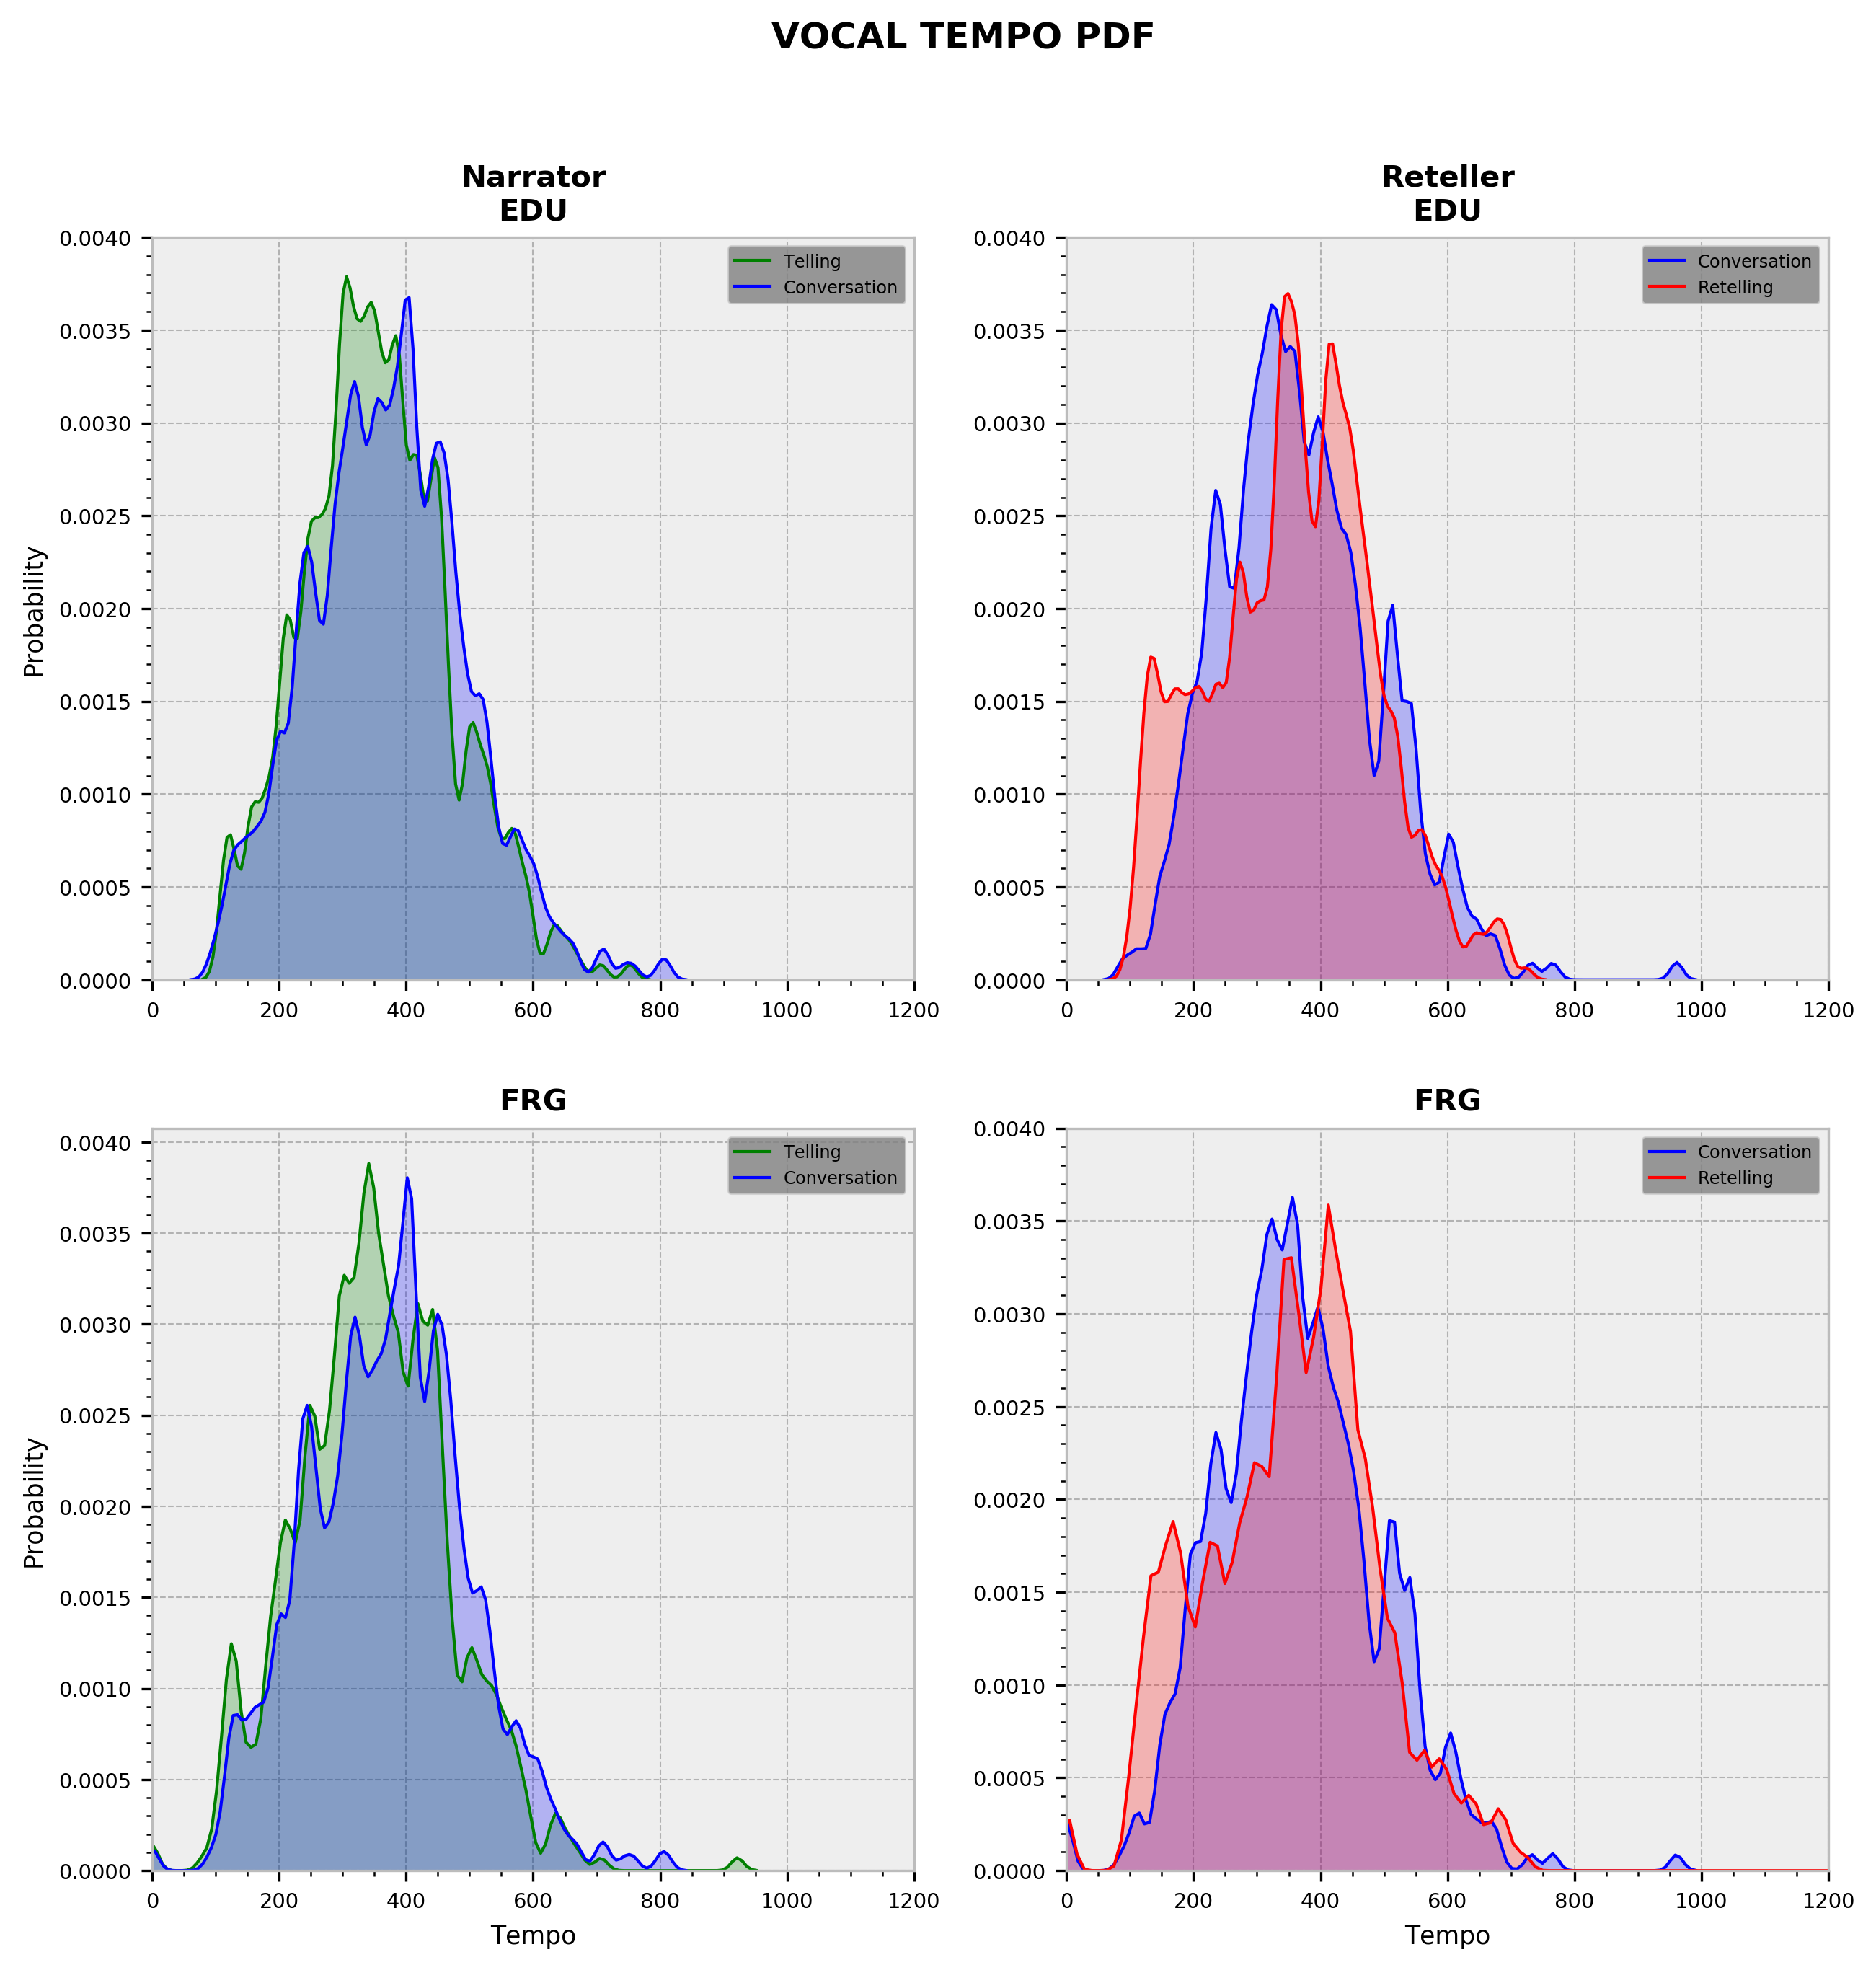

In [13]:
#PDF
#размер графиков нормализуется если еще раз выполнить самый первый блок, где настройки
plt.figure(figsize=(10, 10))
plt.suptitle('VOCAL TEMPO PDF')
plt.subplot(221)
plt.title('Narrator\nEDU')
plt.axis(xmax=1200,ymax=0.0040)
plt.ylabel('Probability')
sns.kdeplot(EDUgroupedN[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(EDUgroupedN[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(222)
plt.title('Reteller\nEDU')
plt.axis(xmax=1200,ymax=0.0040)
sns.kdeplot(EDUgroupedR[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(EDUgroupedR[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#
plt.subplot(223)
plt.title('FRG')
plt.axis(xmax=1200,ymax=0.0040)
plt.xlabel('Tempo')
plt.ylabel('Probability')
sns.kdeplot(FRGgroupedN[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(FRGgroupedN[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(224)
plt.title('FRG')
plt.axis(xmax=1200,ymax=0.0040)
plt.xlabel('Tempo')
sns.kdeplot(FRGgroupedR[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(FRGgroupedR[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)

#тенденция на графике есть (последующий этап имеет в среднем более быстрый темп)

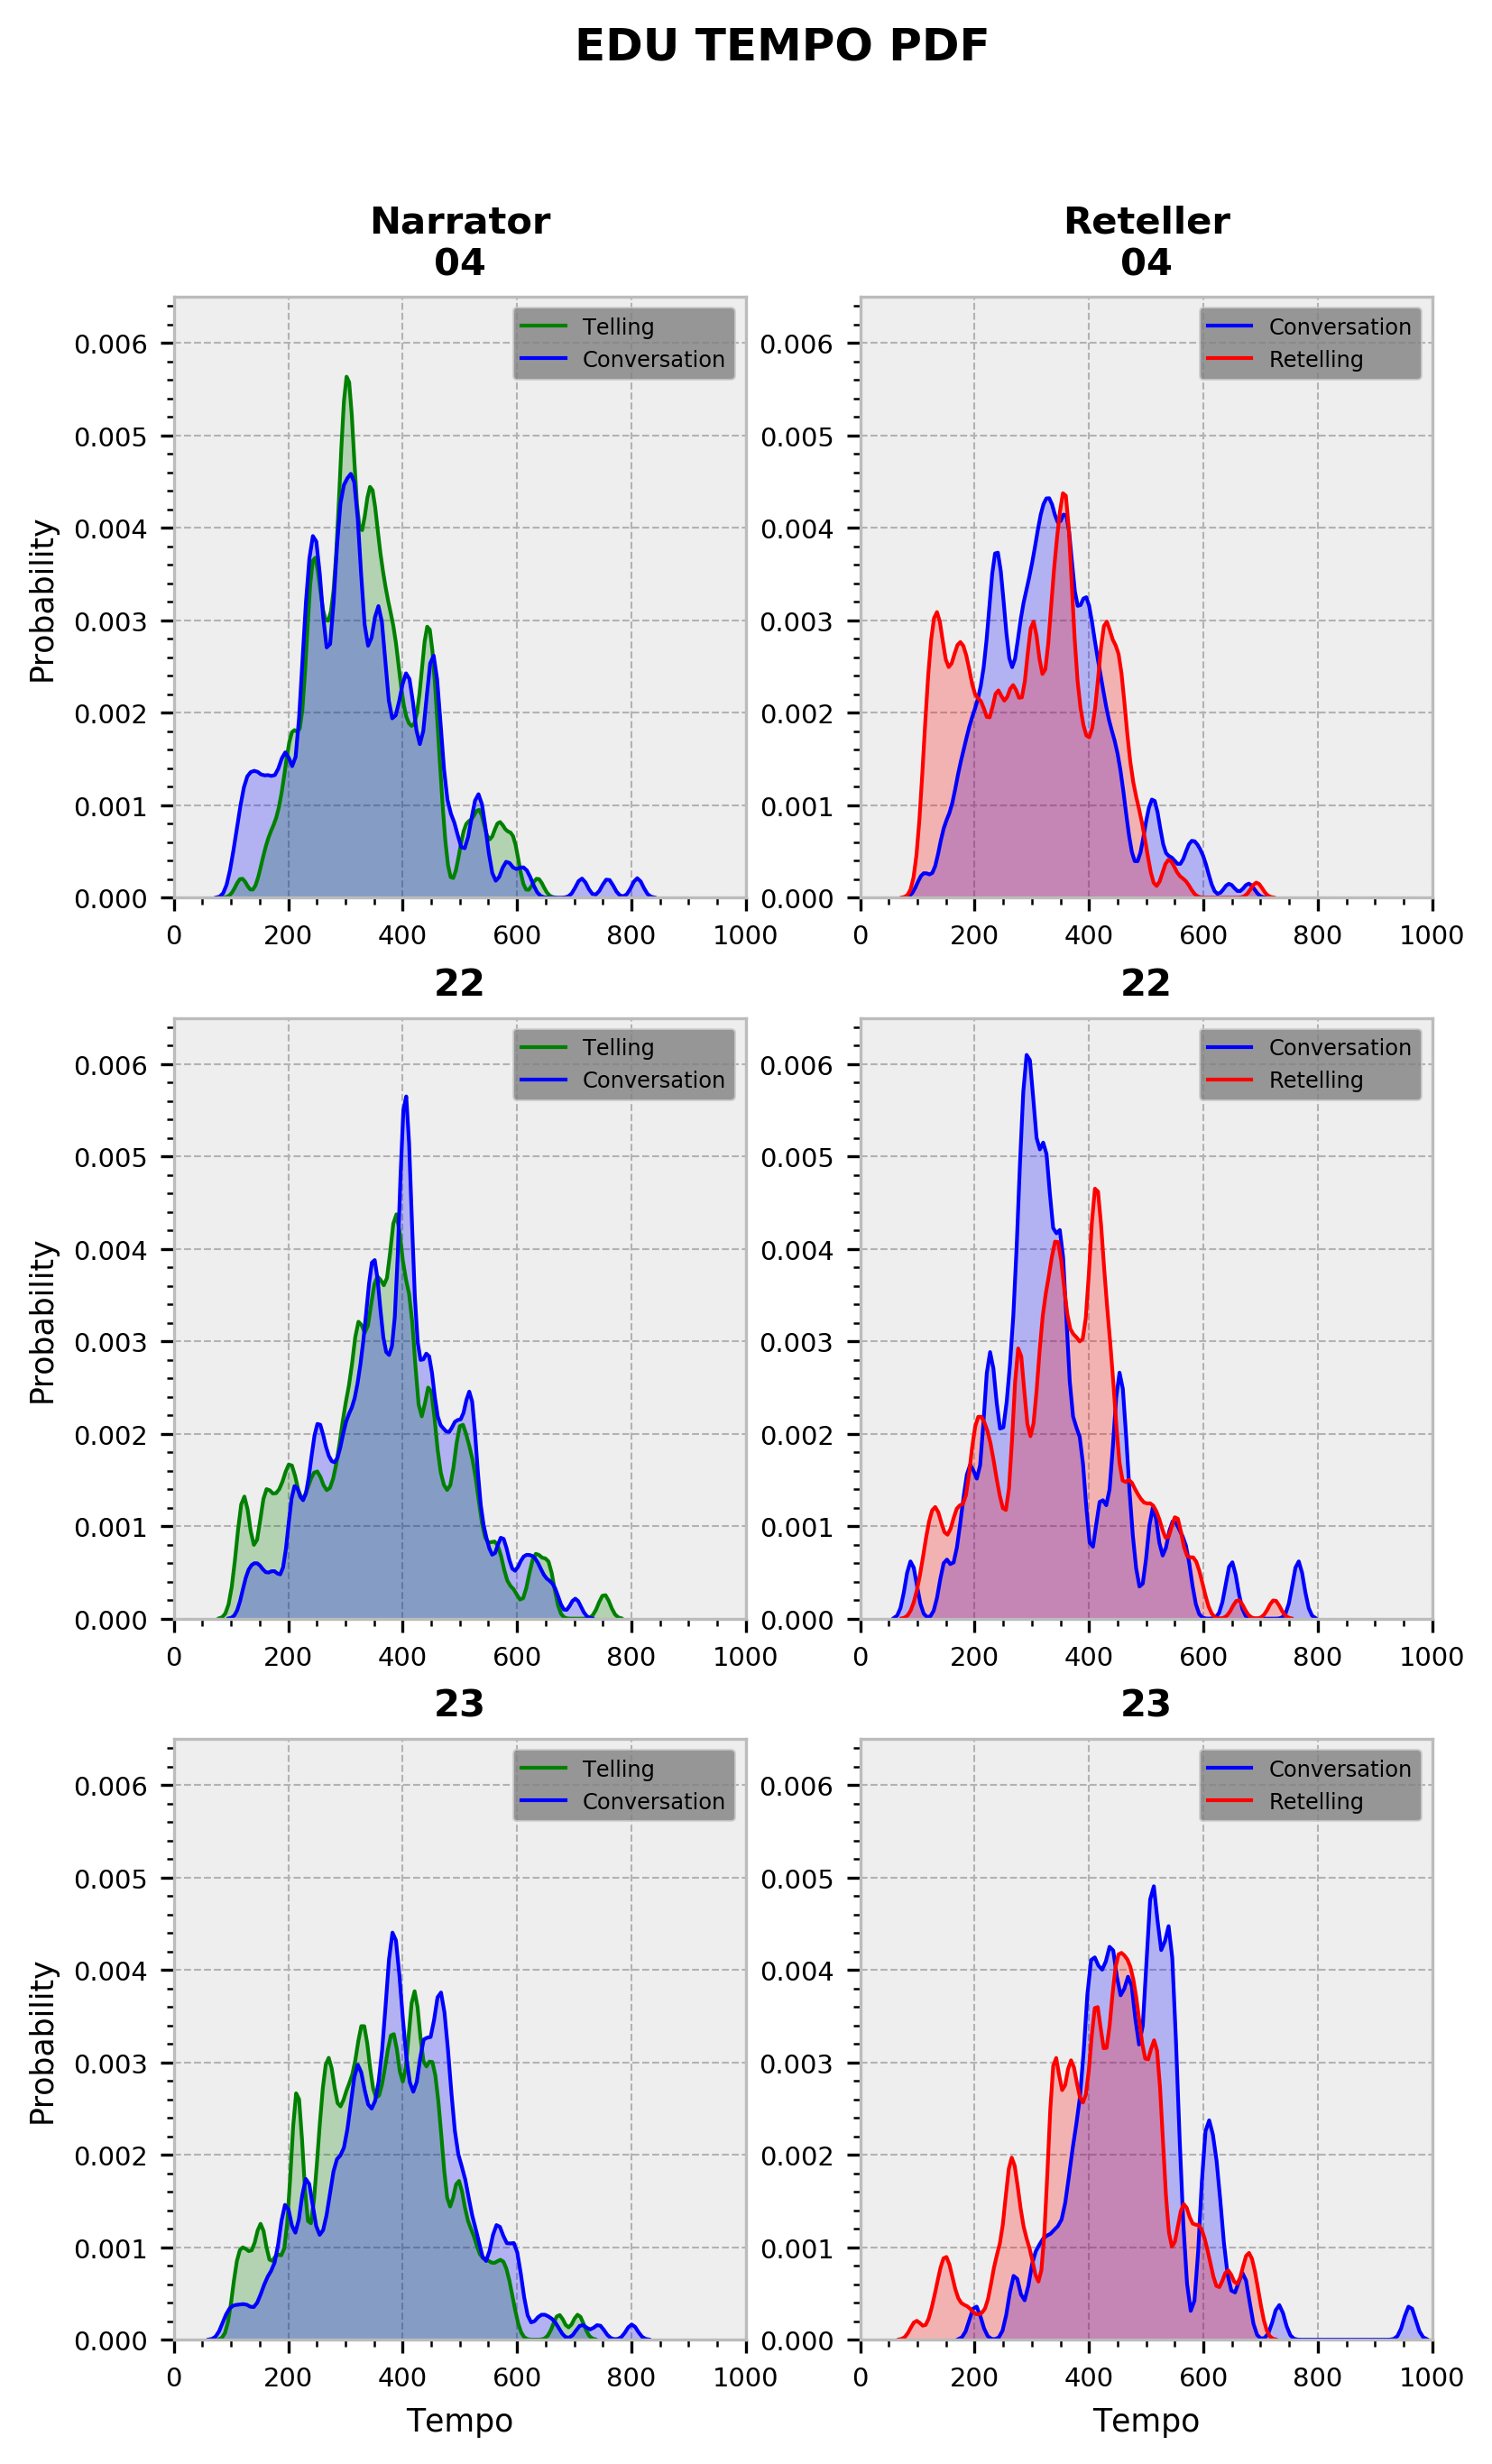

In [261]:
#теперь попарно
groupedBy = dataEDU.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('01_tell','N', 4))
g12 = groupedBy[('Tempo')].get_group(('01_tell','N', 22))
g13 = groupedBy[('Tempo')].get_group(('01_tell','N', 23))
g21 = groupedBy[('Tempo')].get_group(('02_conv','N', 4))
g22 = groupedBy[('Tempo')].get_group(('02_conv','N', 22))
g23 = groupedBy[('Tempo')].get_group(('02_conv','N', 23))
g31 = groupedBy[('Tempo')].get_group(('02_conv','R', 4))
g32 = groupedBy[('Tempo')].get_group(('02_conv','R', 22))
g33 = groupedBy[('Tempo')].get_group(('02_conv','R', 23))
g41 = groupedBy[('Tempo')].get_group(('03_retell','R', 4))
g42 = groupedBy[('Tempo')].get_group(('03_retell','R', 22))
g43 = groupedBy[('Tempo')].get_group(('03_retell','R', 23))

plt.figure(figsize=(6, 10))
plt.suptitle('EDU TEMPO PDF')
plt.subplot(321)
plt.title('Narrator\n04')
plt.axis(xmax=1000,ymax=0.0065)
plt.ylabel('Probability')
sns.kdeplot(g11, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(g21, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(322)
plt.title('Reteller\n04')
plt.axis(xmax=1000,ymax=0.0065)
sns.kdeplot(g31, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(g41, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#
plt.subplot(323)
plt.ylabel('Probability')
plt.title('22')
plt.axis(xmax=1000,ymax=0.0065)
sns.kdeplot(g12, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(g22, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(324)
plt.title('22')
plt.axis(xmax=1000,ymax=0.0065)
sns.kdeplot(g32, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(g42, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#
plt.subplot(325)
plt.title('23')
plt.axis(xmax=1000,ymax=0.0065)
plt.xlabel('Tempo')
plt.ylabel('Probability')
sns.kdeplot(g13, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(g23, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(326)
plt.title('23')
plt.axis(xmax=1000,ymax=0.0065)
plt.xlabel('Tempo')
sns.kdeplot(g33, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(g43, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#

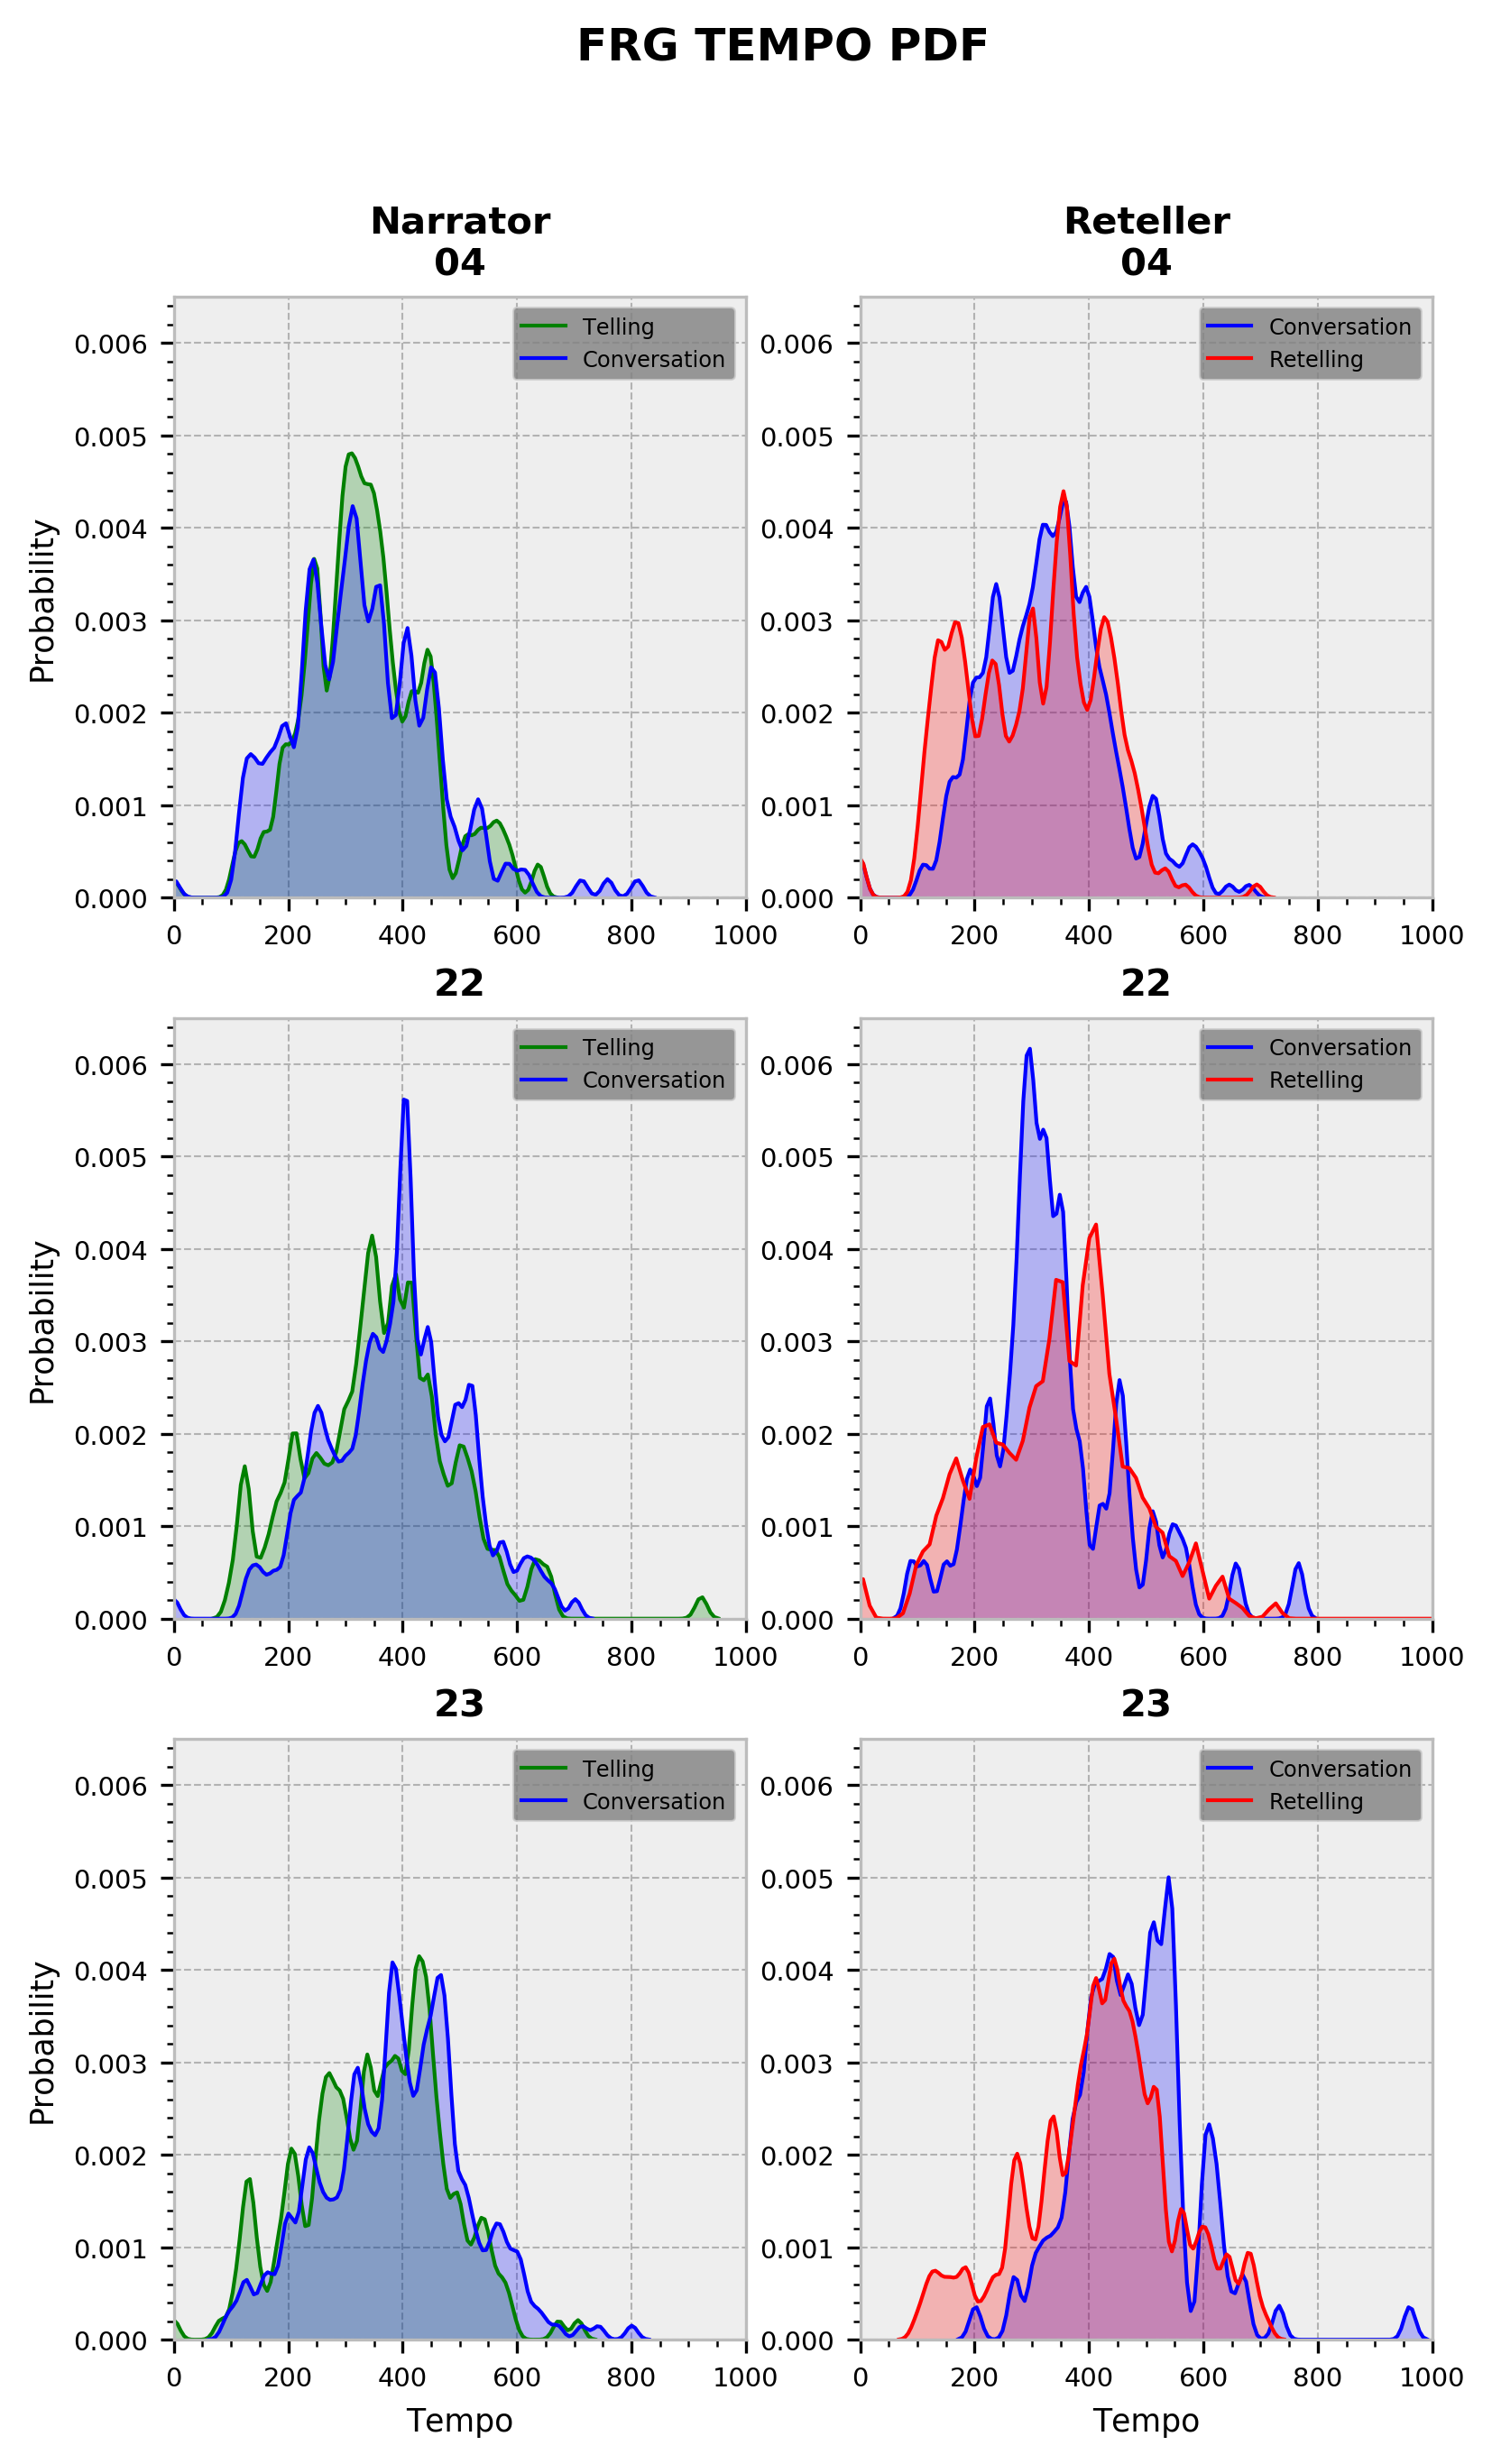

In [262]:
#теперь попарно FRG
groupedBy = dataFRG.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('01_tell','N', 4))
g12 = groupedBy[('Tempo')].get_group(('01_tell','N', 22))
g13 = groupedBy[('Tempo')].get_group(('01_tell','N', 23))
g21 = groupedBy[('Tempo')].get_group(('02_conv','N', 4))
g22 = groupedBy[('Tempo')].get_group(('02_conv','N', 22))
g23 = groupedBy[('Tempo')].get_group(('02_conv','N', 23))
g31 = groupedBy[('Tempo')].get_group(('02_conv','R', 4))
g32 = groupedBy[('Tempo')].get_group(('02_conv','R', 22))
g33 = groupedBy[('Tempo')].get_group(('02_conv','R', 23))
g41 = groupedBy[('Tempo')].get_group(('03_retell','R', 4))
g42 = groupedBy[('Tempo')].get_group(('03_retell','R', 22))
g43 = groupedBy[('Tempo')].get_group(('03_retell','R', 23))

plt.figure(figsize=(6, 10))
plt.suptitle('FRG TEMPO PDF')
plt.subplot(321)
plt.title('Narrator\n04')
plt.axis(xmax=1000,ymax=0.0065)
plt.ylabel('Probability')
sns.kdeplot(g11, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(g21, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(322)
plt.title('Reteller\n04')
plt.axis(xmax=1000,ymax=0.0065)
sns.kdeplot(g31, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(g41, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#
plt.subplot(323)
plt.ylabel('Probability')
plt.title('22')
plt.axis(xmax=1000,ymax=0.0065)
sns.kdeplot(g12, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(g22, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(324)
plt.title('22')
plt.axis(xmax=1000,ymax=0.0065)
sns.kdeplot(g32, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(g42, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#
plt.subplot(325)
plt.title('23')
plt.axis(xmax=1000,ymax=0.0065)
plt.xlabel('Tempo')
plt.ylabel('Probability')
sns.kdeplot(g13, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Telling', color='green', linewidth=1)
sns.kdeplot(g23, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
plt.subplot(326)
plt.title('23')
plt.axis(xmax=1000,ymax=0.0065)
plt.xlabel('Tempo')
sns.kdeplot(g33, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Conversation', color='blue', linewidth=1)
sns.kdeplot(g43, bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='Retelling', color='red', linewidth=1)
#

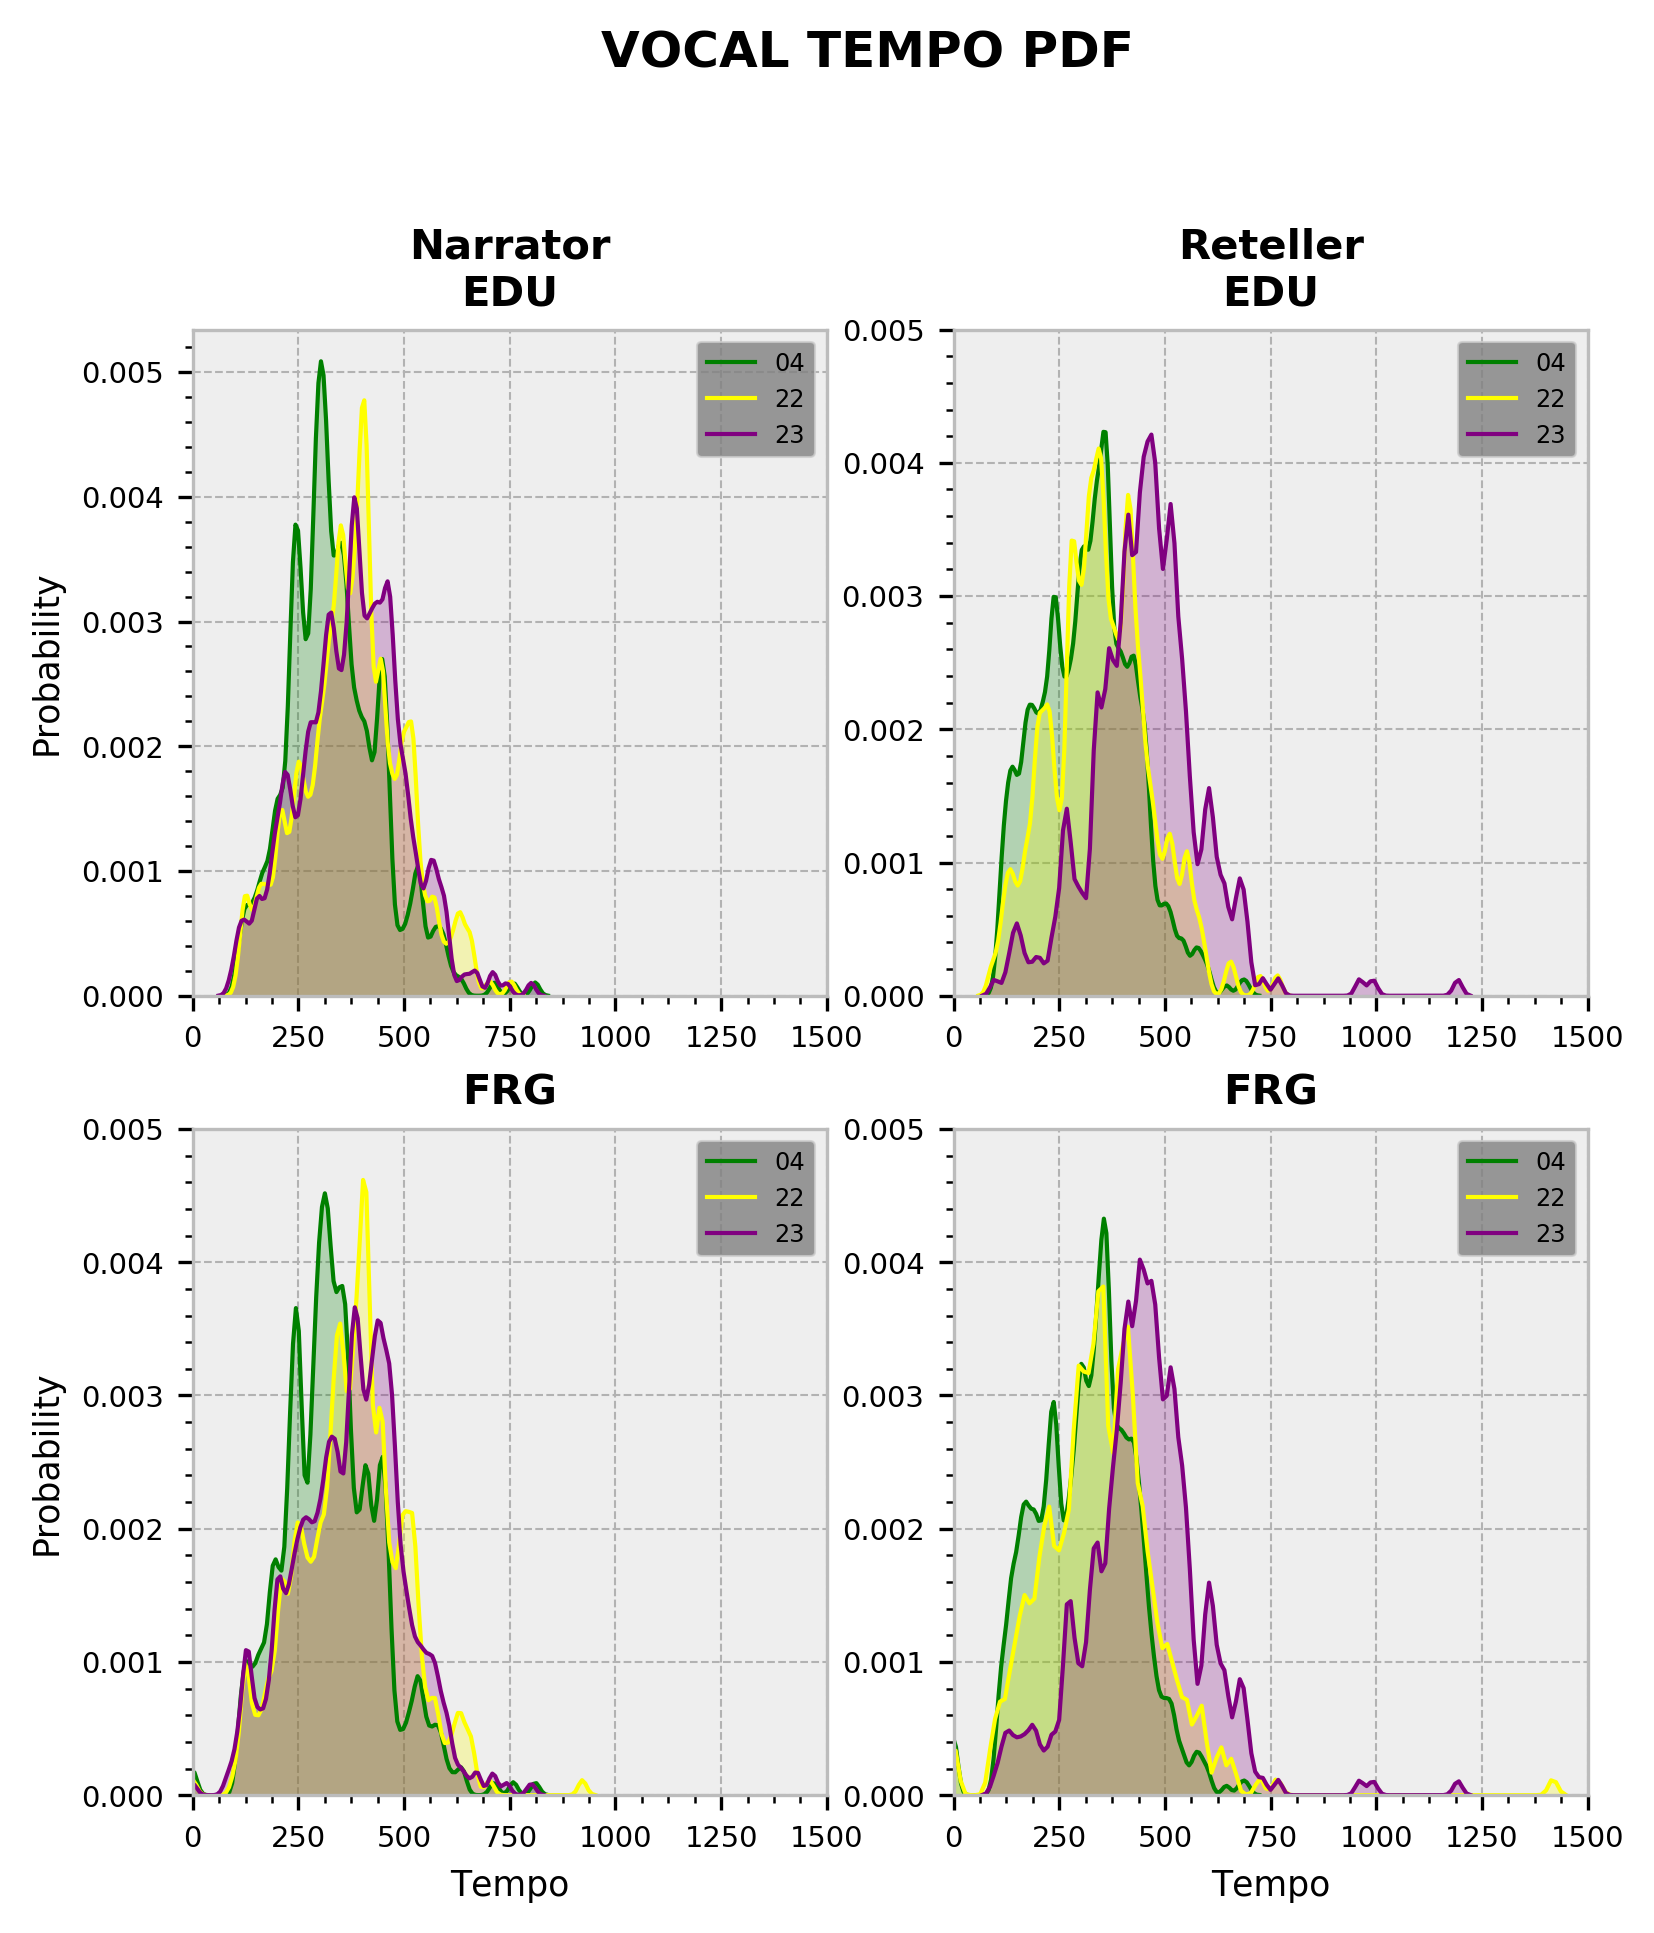

In [90]:
#посмотрим отдельно по записям
EDUgroupedById = dataEDU.groupby(['Id', 'Id 2'])['Tempo']
FRGgroupedById = dataFRG.groupby(['Id', 'Id 2'])['Tempo']
EDUgroupedIdN = [list(EDUgroupedById)[3][1], list(EDUgroupedById)[4][1], list(EDUgroupedById)[5][1]]
EDUgroupedIdR = [list(EDUgroupedById)[6][1], list(EDUgroupedById)[7][1], list(EDUgroupedById)[8][1]]
FRGgroupedIdN = [list(FRGgroupedById)[3][1], list(FRGgroupedById)[4][1], list(FRGgroupedById)[5][1]]
FRGgroupedIdR = [list(FRGgroupedById)[6][1], list(FRGgroupedById)[7][1], list(FRGgroupedById)[8][1]]

plt.figure(figsize=(6, 10))
plt.suptitle('VOCAL TEMPO PDF')
plt.subplot(321)
plt.title('Narrator\nEDU')
plt.axis(xmax=1500,ymax=0.005)
plt.ylabel('Probability')
sns.kdeplot(EDUgroupedIdN[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='04', color='green', linewidth=1)
sns.kdeplot(EDUgroupedIdN[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='22', color='yellow', linewidth=1)
sns.kdeplot(EDUgroupedIdN[2], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='23', color='purple', linewidth=1)
#
plt.subplot(322)
plt.title('Reteller\nEDU')
plt.axis(xmax=1500,ymax=0.005)
sns.kdeplot(EDUgroupedIdR[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='04', color='green', linewidth=1)
sns.kdeplot(EDUgroupedIdR[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='22', color='yellow', linewidth=1)
sns.kdeplot(EDUgroupedIdR[2], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='23', color='purple', linewidth=1)
#
plt.subplot(323)
plt.title('FRG')
plt.axis(xmax=1500,ymax=0.005)
plt.xlabel('Tempo')
plt.ylabel('Probability')
sns.kdeplot(FRGgroupedIdN[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='04', color='green', linewidth=1)
sns.kdeplot(FRGgroupedIdN[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='22', color='yellow', linewidth=1)
sns.kdeplot(FRGgroupedIdN[2], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='23', color='purple', linewidth=1)
#
plt.subplot(324)
plt.title('FRG')
plt.axis(xmax=1500,ymax=0.005)
plt.xlabel('Tempo')
sns.kdeplot(FRGgroupedIdR[0], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='04', color='green', linewidth=1)
sns.kdeplot(FRGgroupedIdR[1], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='22', color='yellow', linewidth=1)
sns.kdeplot(FRGgroupedIdR[2], bw=10, shade=True, vertical=False, gridsize=100, cumulative=False, label='23', color='purple', linewidth=1)

AttributeError: 'PairGrid' object has no attribute 'set_title'

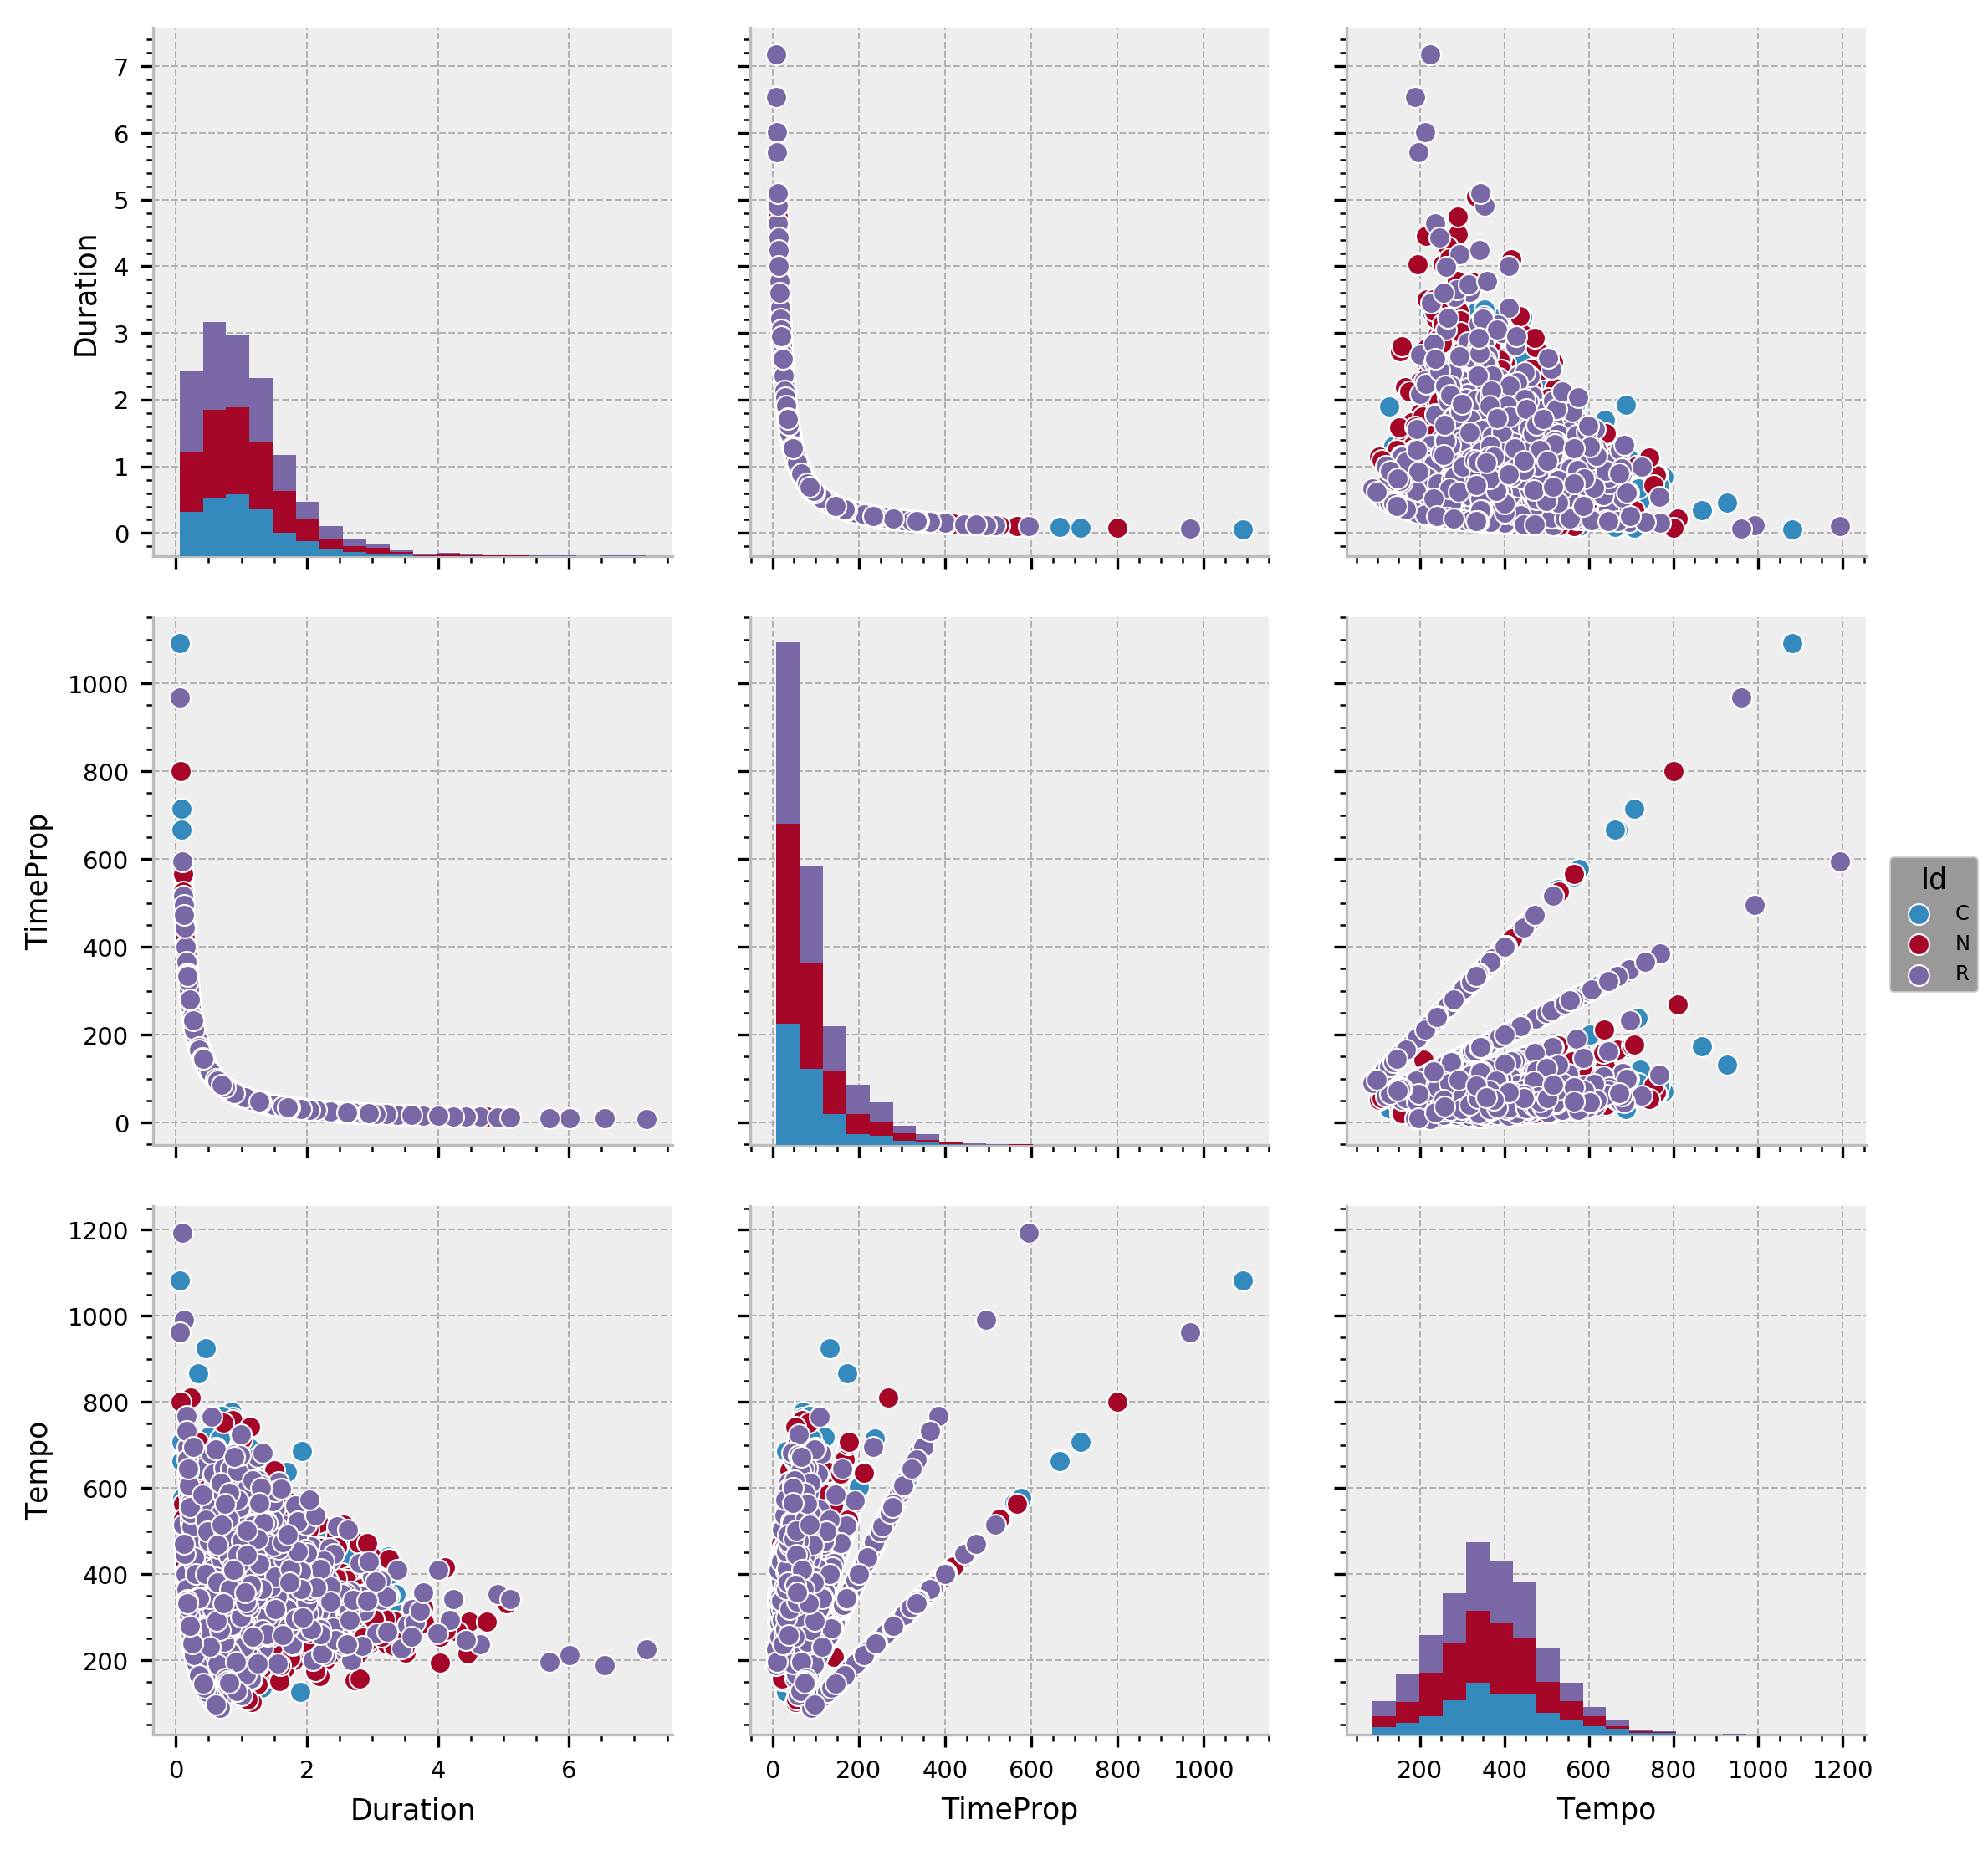

In [193]:
pairData = dataEDU.filter(('Duration','TimeProp','Tempo','Interval','Id'))
ax = sns.pairplot(pairData, diag_kind='hist', hue='Id')

In [4]:
#testing normality
#EDU
groupedBy = dataEDU.groupby(['Interval', 'Id'])
g1 = groupedBy[('Tempo')].get_group(('01_tell','N'))
g2 = groupedBy[('Tempo')].get_group(('02_conv','N'))
g3 = groupedBy[('Tempo')].get_group(('02_conv','R'))
g4 = groupedBy[('Tempo')].get_group(('03_retell','R'))

loc, scale = scipy.stats.norm.fit(g1)
norm1 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g2)
norm2 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g3)
norm3 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g4)
norm4 = scipy.stats.norm(loc=loc, scale=scale)

print(scipy.stats.kstest(g1, norm1.cdf))
print(scipy.stats.kstest(g2, norm2.cdf))
print(scipy.stats.kstest(g3, norm3.cdf))
print(scipy.stats.kstest(g4, norm4.cdf))
#от нормального не отличаются
#
#print(scipy.stats.levene(g1,g2,g3,g4))
print(scipy.stats.levene(g1,g2))
print(scipy.stats.levene(g3,g4))
#дисперсии однородны


#параметрические критерии можно применять, но размеры выборок разные, поэтому вносим поправку на неоднородность дисперсий
print(scipy.stats.f_oneway(g1,g2))
print(scipy.stats.f_oneway(g3,g4))
print(scipy.stats.ttest_ind(g1,g2, equal_var=False))
print(scipy.stats.ttest_ind(g3,g4, equal_var=False))

KstestResult(statistic=0.03098469224776801, pvalue=0.7392025762697305)
KstestResult(statistic=0.02063918909798612, pvalue=0.9521683048025271)
KstestResult(statistic=0.0498439060554558, pvalue=0.22056290947572688)
KstestResult(statistic=0.03889839778165166, pvalue=0.28525137176032)
LeveneResult(statistic=2.226086462755449, pvalue=0.13598105862282303)
LeveneResult(statistic=1.7262741545854665, pvalue=0.1891690398839567)
F_onewayResult(statistic=5.862512113966064, pvalue=0.0156260888099448)
F_onewayResult(statistic=2.4938244262368374, pvalue=0.11458924833801548)
Ttest_indResult(statistic=-2.441365127157461, pvalue=0.014792730808596171)
Ttest_indResult(statistic=1.591550049997634, pvalue=0.11181424653249343)


In [5]:
#FRG
groupedBy = dataFRG.groupby(['Interval', 'Id'])
g1 = groupedBy[('Tempo')].get_group(('01_tell','N'))
g2 = groupedBy[('Tempo')].get_group(('02_conv','N'))
g3 = groupedBy[('Tempo')].get_group(('02_conv','R'))
g4 = groupedBy[('Tempo')].get_group(('03_retell','R'))

loc, scale = scipy.stats.norm.fit(g1)
norm1 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g2)
norm2 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g3)
norm3 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g4)
norm4 = scipy.stats.norm(loc=loc, scale=scale)

print(scipy.stats.kstest(g1, norm1.cdf))
print(scipy.stats.kstest(g2, norm2.cdf))
print(scipy.stats.kstest(g3, norm3.cdf))
print(scipy.stats.kstest(g4, norm4.cdf))
#
print(scipy.stats.levene(g1,g2))
print(scipy.stats.levene(g3,g4))


print(scipy.stats.f_oneway(g1,g2))
print(scipy.stats.f_oneway(g3,g4))
print(scipy.stats.ttest_ind(g1,g2, equal_var=False))
print(scipy.stats.ttest_ind(g3,g4, equal_var=False))

KstestResult(statistic=0.02790460505206882, pvalue=0.7608831415651668)
KstestResult(statistic=0.02557423673950268, pvalue=0.7787220042802876)
KstestResult(statistic=0.04127020638527268, pvalue=0.40333140201762085)
KstestResult(statistic=0.03795835209886994, pvalue=0.21758171046260477)
LeveneResult(statistic=2.116542902976332, pvalue=0.14596883261524185)
LeveneResult(statistic=3.745461279719147, pvalue=0.05318178270089163)
F_onewayResult(statistic=9.923864894321033, pvalue=0.0016705974200452265)
F_onewayResult(statistic=1.8003014366555805, pvalue=0.17992552808581)
Ttest_indResult(statistic=-3.161143746388959, pvalue=0.0016099838585095464)
Ttest_indResult(statistic=1.3732825899950405, pvalue=0.16995910218885388)


In [257]:
#теперь попарно
#EDU
groupedBy = dataEDU.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('01_tell','N', 4))
g12 = groupedBy[('Tempo')].get_group(('01_tell','N', 22))
g13 = groupedBy[('Tempo')].get_group(('01_tell','N', 23))
g21 = groupedBy[('Tempo')].get_group(('02_conv','N', 4))
g22 = groupedBy[('Tempo')].get_group(('02_conv','N', 22))
g23 = groupedBy[('Tempo')].get_group(('02_conv','N', 23))
g31 = groupedBy[('Tempo')].get_group(('02_conv','R', 4))
g32 = groupedBy[('Tempo')].get_group(('02_conv','R', 22))
g33 = groupedBy[('Tempo')].get_group(('02_conv','R', 23))
g41 = groupedBy[('Tempo')].get_group(('03_retell','R', 4))
g42 = groupedBy[('Tempo')].get_group(('03_retell','R', 22))
g43 = groupedBy[('Tempo')].get_group(('03_retell','R', 23))


print(scipy.stats.ttest_ind(g11,g21, equal_var=False))
print(scipy.stats.ttest_ind(g12,g22, equal_var=False))
print(scipy.stats.ttest_ind(g13,g23, equal_var=False))
#
print(scipy.stats.ttest_ind(g31,g41, equal_var=False))
print(scipy.stats.ttest_ind(g32,g42, equal_var=False))
print(scipy.stats.ttest_ind(g33,g43, equal_var=False))




#FRG
groupedBy = dataFRG.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('01_tell','N', 4))
g12 = groupedBy[('Tempo')].get_group(('01_tell','N', 22))
g13 = groupedBy[('Tempo')].get_group(('01_tell','N', 23))
g21 = groupedBy[('Tempo')].get_group(('02_conv','N', 4))
g22 = groupedBy[('Tempo')].get_group(('02_conv','N', 22))
g23 = groupedBy[('Tempo')].get_group(('02_conv','N', 23))
g31 = groupedBy[('Tempo')].get_group(('02_conv','R', 4))
g32 = groupedBy[('Tempo')].get_group(('02_conv','R', 22))
g33 = groupedBy[('Tempo')].get_group(('02_conv','R', 23))
g41 = groupedBy[('Tempo')].get_group(('03_retell','R', 4))
g42 = groupedBy[('Tempo')].get_group(('03_retell','R', 22))
g43 = groupedBy[('Tempo')].get_group(('03_retell','R', 23))


print('----')
print(scipy.stats.ttest_ind(g11,g21, equal_var=False))
print(scipy.stats.ttest_ind(g12,g22, equal_var=False))
print(scipy.stats.ttest_ind(g13,g23, equal_var=False))
#
print(scipy.stats.ttest_ind(g31,g41, equal_var=False))
print(scipy.stats.ttest_ind(g32,g42, equal_var=False))
print(scipy.stats.ttest_ind(g33,g43, equal_var=False))

Ttest_indResult(statistic=1.0721584699532656, pvalue=0.28435135223819236)
Ttest_indResult(statistic=-1.7770922896549841, pvalue=0.07655555322091853)
Ttest_indResult(statistic=-2.669493844837287, pvalue=0.007994301681242478)
Ttest_indResult(statistic=2.9903780923669117, pvalue=0.0029265595149854844)
Ttest_indResult(statistic=-0.7058561084878453, pvalue=0.48183247283583774)
Ttest_indResult(statistic=3.803803853705804, pvalue=0.00017990078970923714)
----
Ttest_indResult(statistic=0.595882660275712, pvalue=0.5515928707763491)
Ttest_indResult(statistic=-2.1358785477598228, pvalue=0.033410552283533526)
Ttest_indResult(statistic=-3.085371711352643, pvalue=0.0021683448575610734)
Ttest_indResult(statistic=2.7741473501455185, pvalue=0.00571850897092134)
Ttest_indResult(statistic=-0.6116700954737853, pvalue=0.541893125259679)
Ttest_indResult(statistic=4.37566991728875, pvalue=1.7698581574554837e-05)


KstestResult(statistic=0.08066308519423715, pvalue=0.08328579164830074)
KstestResult(statistic=0.07388831968852394, pvalue=0.23138854328340908)
KstestResult(statistic=0.04413966293037519, pvalue=0.6891014409638587)
LeveneResult(statistic=3.220441387410747, pvalue=0.040533297783805336)
F_onewayResult(statistic=2.6766497435716157, pvalue=0.06944953173523172)
Ttest_indResult(statistic=1.7799873634773609, pvalue=0.07584536792857911)
Ttest_indResult(statistic=2.19304363154734, pvalue=0.028723253256177497)
Ttest_indResult(statistic=0.07316478359540048, pvalue=0.9417116603551816)


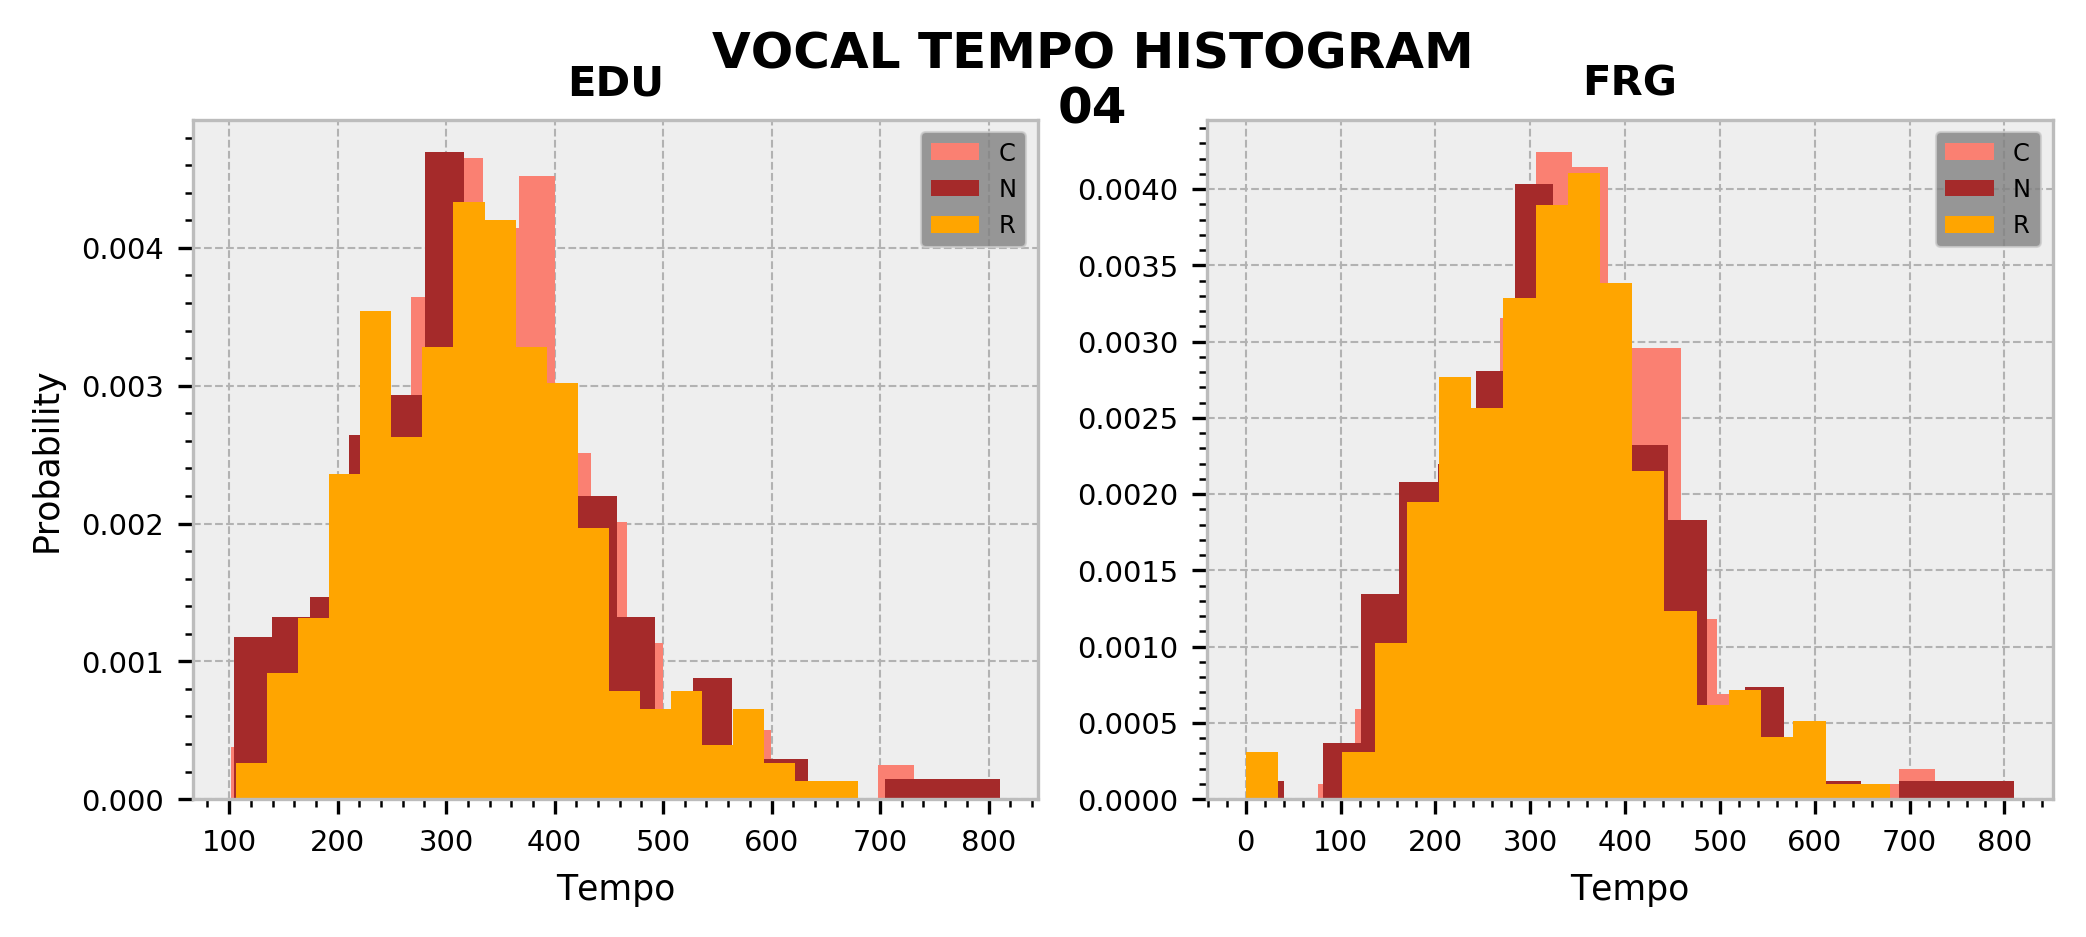

In [8]:
#ПОДСТРАИВАЕТСЯ ЛИ ТЕМП ДРУГ ПОД ДРУГА
#04
groupedBy = dataEDU.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('02_conv','C', 4))
g12 = groupedBy[('Tempo')].get_group(('02_conv','N', 4))
g13 = groupedBy[('Tempo')].get_group(('02_conv','R', 4))
#
groupedByFRG = dataFRG.groupby(['Interval', 'Id', 'Id 2'])
g11FRG = groupedByFRG[('Tempo')].get_group(('02_conv','C', 4))
g12FRG = groupedByFRG[('Tempo')].get_group(('02_conv','N', 4))
g13FRG = groupedByFRG[('Tempo')].get_group(('02_conv','R', 4))

loc, scale = scipy.stats.norm.fit(g11)
norm11 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g12)
norm12 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(g13)
norm13 = scipy.stats.norm(loc=loc, scale=scale)


print(scipy.stats.kstest(g11, norm11.cdf))
print(scipy.stats.kstest(g12, norm12.cdf))
print(scipy.stats.kstest(g13, norm13.cdf))

print(scipy.stats.levene(g11,g12,g13))


print(scipy.stats.f_oneway(g11FRG, g12FRG, g13FRG))
print(scipy.stats.ttest_ind(g11FRG, g12FRG, equal_var=False))
print(scipy.stats.ttest_ind(g11FRG, g13FRG, equal_var=False))
print(scipy.stats.ttest_ind(g12FRG, g13FRG, equal_var=False))


#
plt.figure(figsize=(8, 3))
plt.suptitle('VOCAL TEMPO HISTOGRAM\n04')
plt.subplot(121)
plt.title('EDU')
plt.xlabel('Tempo')
plt.ylabel('Probability')
plt.hist(g11, density=True, cumulative=False, orientation='vertical', rwidth=2, label='C', color='salmon')
plt.hist(g12, density=True, cumulative=False, orientation='vertical', rwidth=2, label='N', color='brown')
plt.hist(g13, density=True, cumulative=False, orientation='vertical', rwidth=2, label='R', color='orange')
plt.legend()
plt.subplot(122)
plt.title('FRG')
plt.xlabel('Tempo')
plt.hist(g11FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='C', color='salmon')
plt.hist(g12FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='N', color='brown')
plt.hist(g13FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='R', color='orange')
plt.legend()

F_onewayResult(statistic=1.6832441965041027, pvalue=0.19515570768096577)
F_onewayResult(statistic=0.9889028037455329, pvalue=0.32049168828879493)
F_onewayResult(statistic=12.760160353464277, pvalue=0.00040695687550146287)
F_onewayResult(statistic=8.8938882231398, pvalue=0.00314521379798231)
F_onewayResult(statistic=11.427428709319969, pvalue=0.000800383437039005)
F_onewayResult(statistic=9.275876858652829, pvalue=0.002562490705319642)


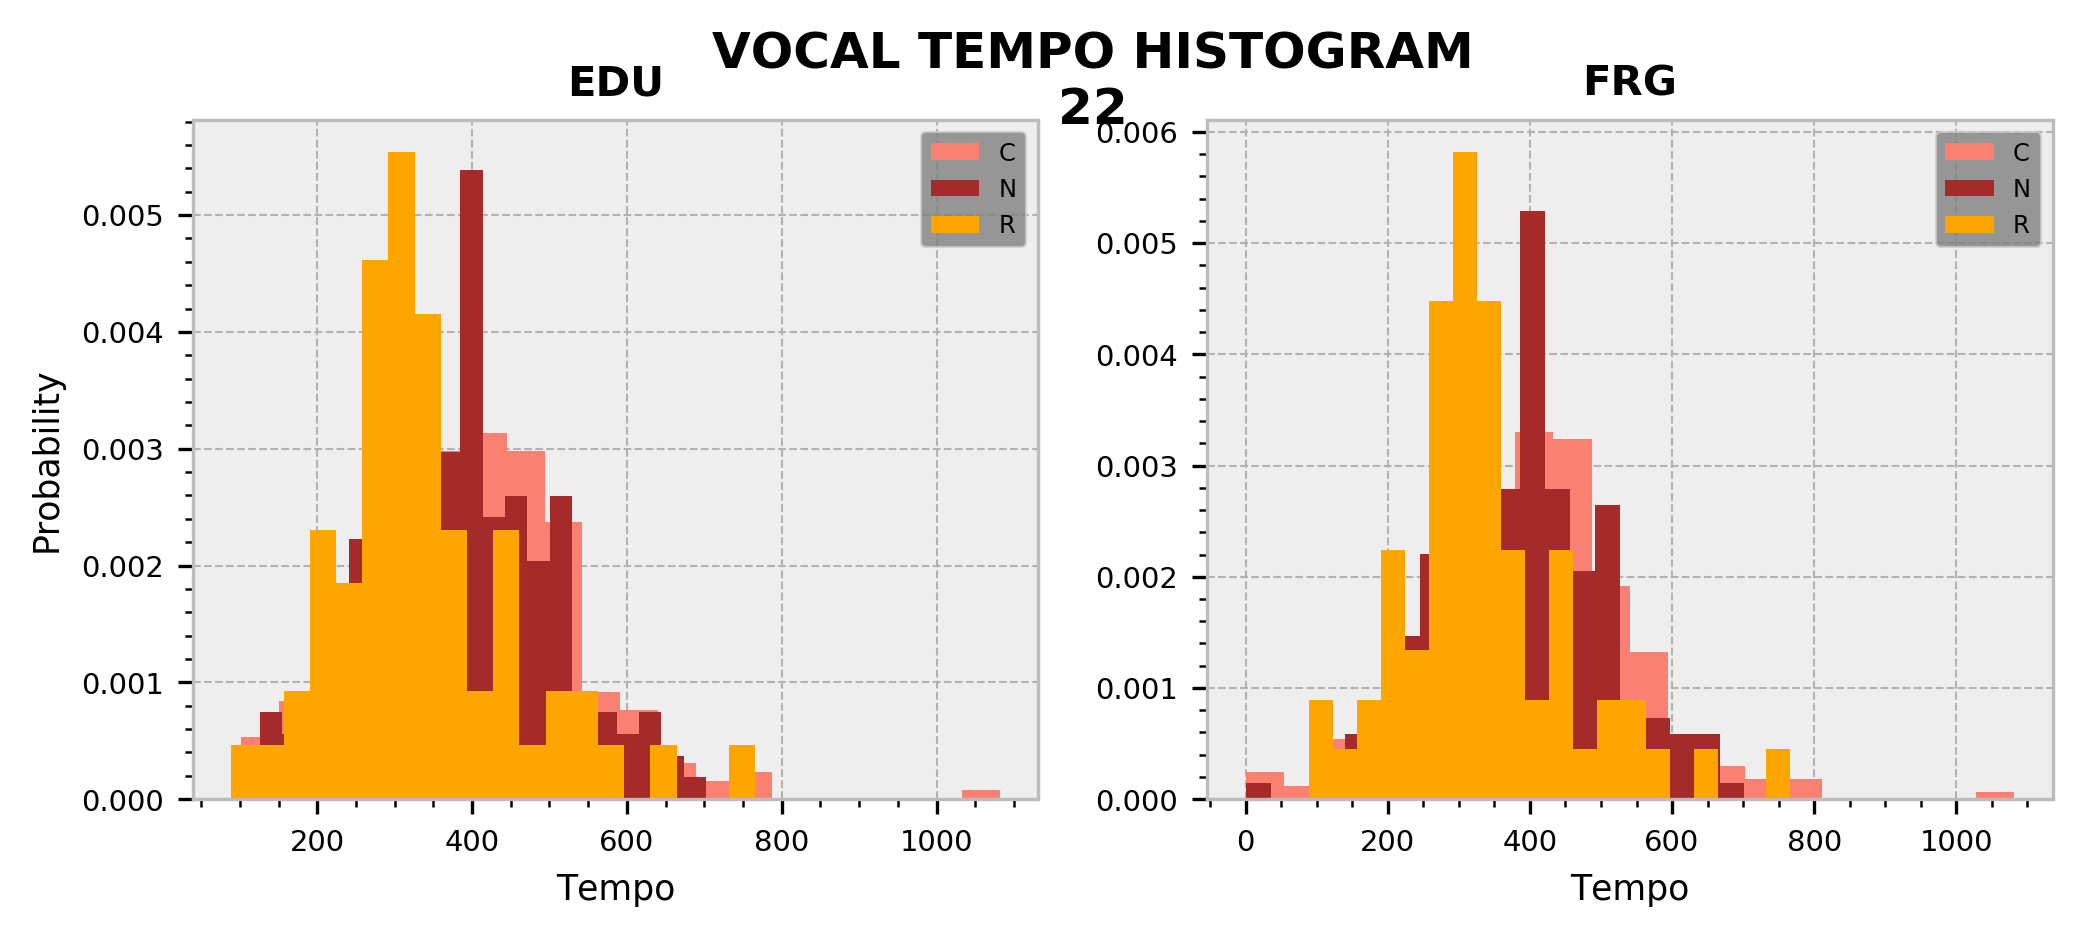

In [306]:
#22
groupedBy = dataEDU.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('02_conv','C', 22))
g12 = groupedBy[('Tempo')].get_group(('02_conv','N', 22))
g13 = groupedBy[('Tempo')].get_group(('02_conv','R', 22))
#
groupedByFRG = dataFRG.groupby(['Interval', 'Id', 'Id 2'])
g11FRG = groupedByFRG[('Tempo')].get_group(('02_conv','C', 22))
g12FRG = groupedByFRG[('Tempo')].get_group(('02_conv','N', 22))
g13FRG = groupedByFRG[('Tempo')].get_group(('02_conv','R', 22))


print(scipy.stats.f_oneway(g11,g12))
print(scipy.stats.f_oneway(g11FRG,g12FRG))
#
print(scipy.stats.f_oneway(g11,g13))
print(scipy.stats.f_oneway(g12,g13))
print(scipy.stats.f_oneway(g11FRG,g13FRG))
print(scipy.stats.f_oneway(g12FRG,g13FRG))


#
plt.figure(figsize=(8, 3))
plt.suptitle('VOCAL TEMPO HISTOGRAM\n22')
plt.subplot(121)
plt.title('EDU')
plt.xlabel('Tempo')
plt.ylabel('Probability')
plt.hist(g11, density=True, cumulative=False, orientation='vertical', rwidth=2, label='C', color='salmon')
plt.hist(g12, density=True, cumulative=False, orientation='vertical', rwidth=2, label='N', color='brown')
plt.hist(g13, density=True, cumulative=False, orientation='vertical', rwidth=2, label='R', color='orange')
plt.legend()
plt.subplot(122)
plt.title('FRG')
plt.xlabel('Tempo')
plt.hist(g11FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='C', color='salmon')
plt.hist(g12FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='N', color='brown')
plt.hist(g13FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='R', color='orange')
plt.legend()

F_onewayResult(statistic=0.38888778837278054, pvalue=0.5331890698957586)
F_onewayResult(statistic=0.016472999728641392, pvalue=0.8979246234991558)
F_onewayResult(statistic=25.4752727470568, pvalue=7.452646300235268e-07)
F_onewayResult(statistic=42.7020873786533, pvalue=2.2375630908375482e-10)
F_onewayResult(statistic=31.057937534853224, pvalue=4.9696782094753594e-08)
F_onewayResult(statistic=43.612109118977614, pvalue=1.3766452028144284e-10)


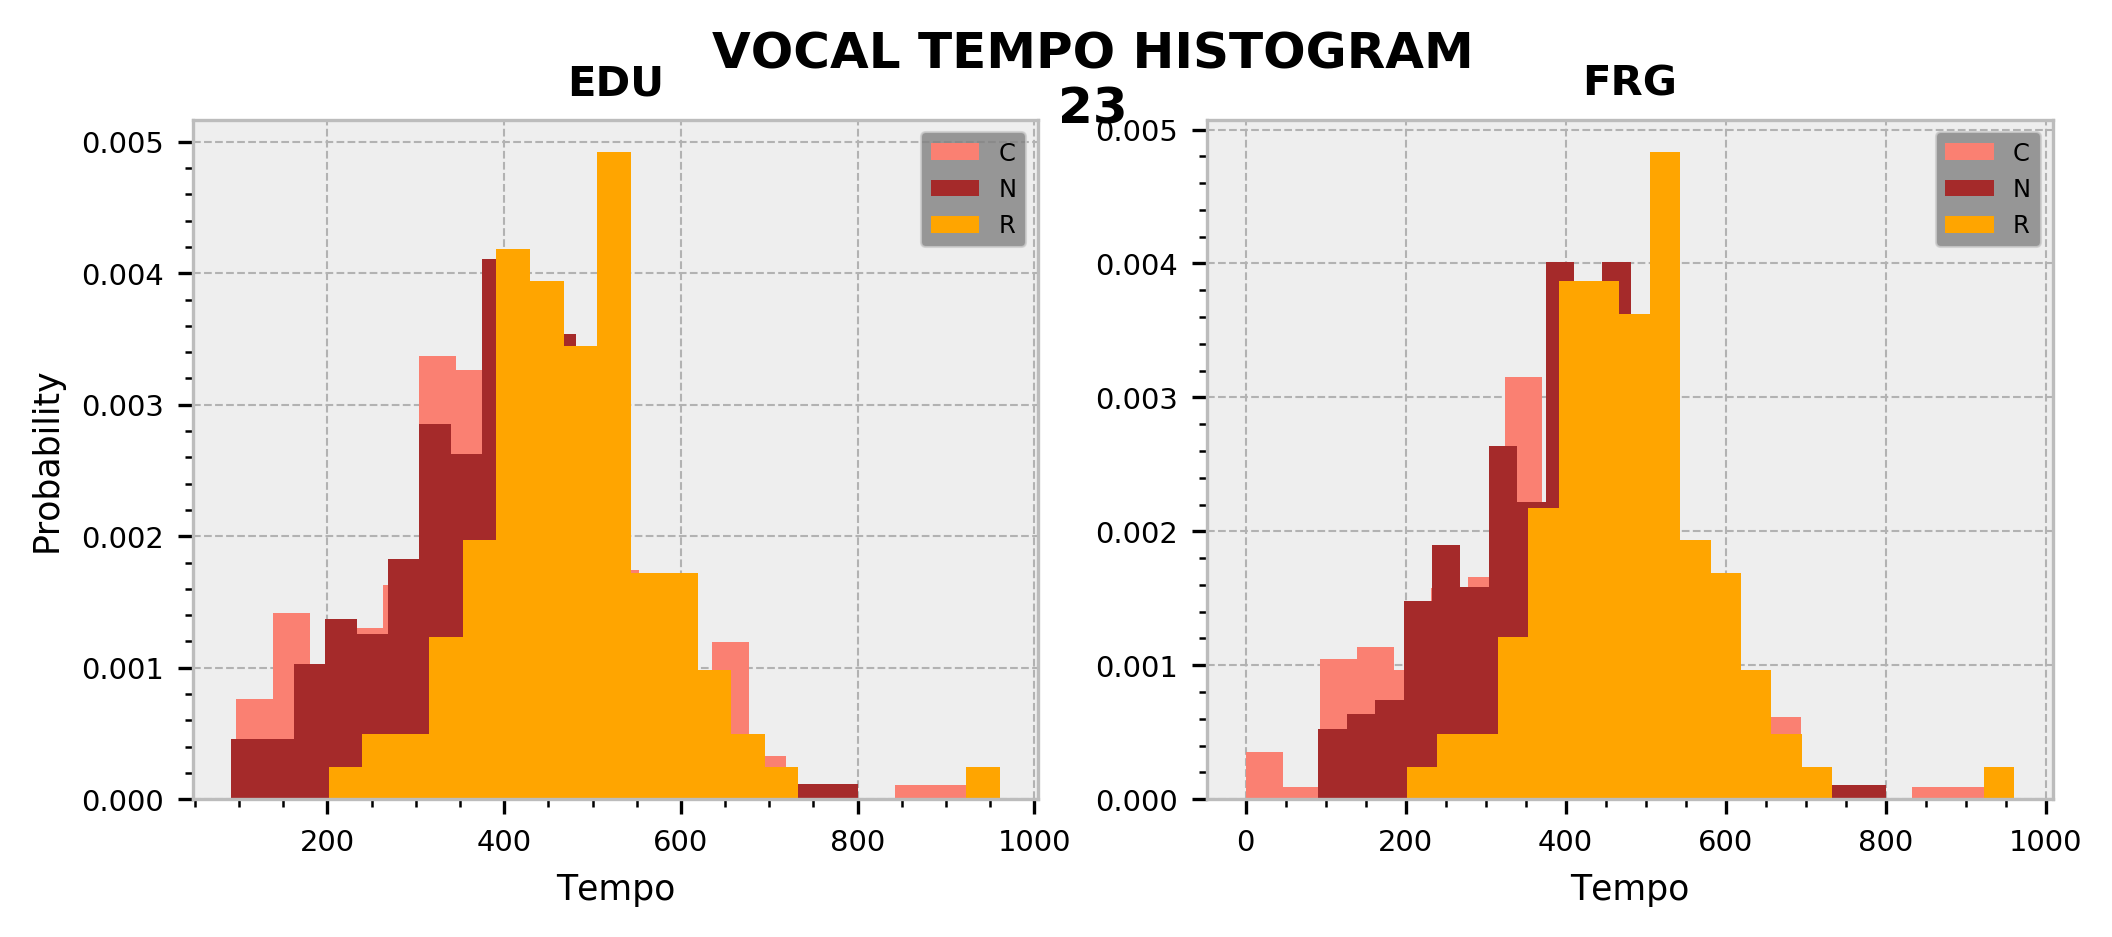

In [307]:
#23
groupedBy = dataEDU.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Tempo')].get_group(('02_conv','C', 23))
g12 = groupedBy[('Tempo')].get_group(('02_conv','N', 23))
g13 = groupedBy[('Tempo')].get_group(('02_conv','R', 23))
#
groupedByFRG = dataFRG.groupby(['Interval', 'Id', 'Id 2'])
g11FRG = groupedByFRG[('Tempo')].get_group(('02_conv','C', 23))
g12FRG = groupedByFRG[('Tempo')].get_group(('02_conv','N', 23))
g13FRG = groupedByFRG[('Tempo')].get_group(('02_conv','R', 23))


print(scipy.stats.f_oneway(g11,g12))
print(scipy.stats.f_oneway(g11FRG,g12FRG))
#
print(scipy.stats.f_oneway(g11,g13))
print(scipy.stats.f_oneway(g12,g13))
print(scipy.stats.f_oneway(g11FRG,g13FRG))
print(scipy.stats.f_oneway(g12FRG,g13FRG))


#
plt.figure(figsize=(8, 3))
plt.suptitle('VOCAL TEMPO HISTOGRAM\n23')
plt.subplot(121)
plt.title('EDU')
plt.xlabel('Tempo')
plt.ylabel('Probability')
plt.hist(g11, density=True, cumulative=False, orientation='vertical', rwidth=2, label='C', color='salmon')
plt.hist(g12, density=True, cumulative=False, orientation='vertical', rwidth=2, label='N', color='brown')
plt.hist(g13, density=True, cumulative=False, orientation='vertical', rwidth=2, label='R', color='orange')
plt.legend()
plt.subplot(122)
plt.title('FRG')
plt.xlabel('Tempo')
plt.hist(g11FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='C', color='salmon')
plt.hist(g12FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='N', color='brown')
plt.hist(g13FRG, density=True, cumulative=False, orientation='vertical', rwidth=2, label='R', color='orange')
plt.legend()

In [4]:
#CORRELATIONS, Ge-EDU+1, etc.
data = rtg.multiData.getChannelById('manu-voc-tempo', 'all')
refs = rtg.multiData.getChannelById('manu-voc-reftable', 'all')
dataGesture=data.loc[data['EventType']=='Gesture']
dataGeStroke=data.loc[data['EventType']=='GeStroke']
#dataEDU=data.loc[data['EventType']=='EDU']
#dataFRG=data.loc[data['EventType']=='FRG']

refs['RefIdMinus1']=''
refs['RefIdPlus1']=''
refs['RefIdPlus2']=''
for index,row in refs.iterrows():
    found=re.search('([A-Za-z]-tmp[EF])(\d+)', row['RefId'], flags=re.IGNORECASE).groups()
    refText = found[0]
    refNum = int(found[1])
    refs.loc[index,'RefIdMinus1'] = '{0}{1}'.format(refText, str(refNum-1).zfill(3))
    refs.loc[index,'RefIdPlus1'] = '{0}{1}'.format(refText, str(refNum+1).zfill(3))
    refs.loc[index,'RefIdPlus2'] = '{0}{1}'.format(refText, str(refNum+2).zfill(3))

In [22]:
GestureRefd = dataGesture.merge(refs, how='left', on=('Id', 'Id 2', 'EventId'), suffixes=('','Ref'))
#GestureRefd.filter(('Duration','TimeProp','Tempo', 'Interval', 'Id', 'Id 2', 'EventId', 'RefId', 'RefIdMinus1', 'RefIdPlus1', 'RefIdPlus2'))

merged = GestureRefd.merge(dataEDU, how='left', left_on=('Id', 'Id 2', 'RefId'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','EDU'))
mergedMinus1 = GestureRefd.merge(dataEDU, how='left', left_on=('Id', 'Id 2', 'RefIdMinus1'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','EDU'))
mergedPlus1 = GestureRefd.merge(dataEDU, how='left', left_on=('Id', 'Id 2', 'RefIdPlus1'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','EDU'))
mergedPlus2 = GestureRefd.merge(dataEDU, how='left', left_on=('Id', 'Id 2', 'RefIdPlus2'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','EDU'))
#
#print(mergedMinus1.columns)
#mergedMinus1.filter(('Interval','Id','Id 2','EventId','Duration','TimeProp','Tempo','RefId','RefIdMinus1','IntervalEDU','EventIdEDU','DurationEDU','TimePropEDU','TempoEDU'))

KstestResult(statistic=0.12324623983650368, pvalue=0.0)
KstestResult(statistic=0.16106546894445317, pvalue=0.0)
SpearmanrResult(correlation=0.011828697498467815, pvalue=0.5422211781228081)
SpearmanrResult(correlation=0.03165770470541978, pvalue=0.1027907393039895)


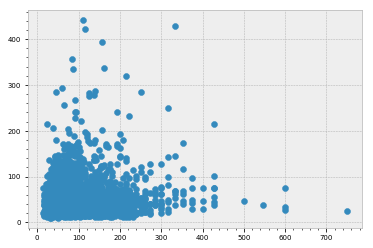

In [23]:
#print(merged.filter(('Duration','TimeProp','Tempo','DurationEDU','TimePropEDU','TempoEDU')))
mergedDropped = merged.dropna(subset=['Duration','TimeProp','DurationEDU','TimePropEDU','TempoEDU'])


loc, scale = scipy.stats.norm.fit(mergedDropped['TimeProp'])
norm1 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(mergedDropped['TimePropEDU'])
norm2 = scipy.stats.norm(loc=loc, scale=scale)

print(scipy.stats.kstest(mergedDropped['TimeProp'], norm1.cdf))
print(scipy.stats.kstest(mergedDropped['TimePropEDU'], norm2.cdf))
#отличается от нормального, используем Спирмена



print(scipy.stats.spearmanr(mergedDropped['TimeProp'], mergedDropped['TimePropEDU']))
print(scipy.stats.spearmanr(mergedDropped['TimeProp'], mergedDropped['TempoEDU']))
#
plt.scatter(mergedDropped['TimeProp'], mergedDropped['TimePropEDU'])

In [9]:
#Scatter3D (plotly)
#TODO figure size bigger
trace1 = go.Scatter3d(x=mergedDropped['DurationEDU'],
                      y=mergedDropped['TimePropEDU'],
                      z=mergedDropped['TempoEDU'],
                      mode='markers', marker=dict(size=4, opacity=0.5, colorscale='Viridis')
                     )
layout = go.Layout(scene=dict(dict(xaxis=dict(title='Duration'), 
                                   yaxis=dict(title='TimeProp'),
                                   zaxis=dict(title='Tempo')
                                  )
                             )
                  )
figData = [trace1]
fig1 = dict(data=figData, layout=layout)
py.plot(fig1, filename='scatter3d01.html', auto_open=True)
#py.iplot(fig1)

'file://G:\\projects\\multidiscourse\\scripts\\readTobiiGlasses\\src\\scatter3d01.html'

KstestResult(statistic=0.12321768220671614, pvalue=0.0)
KstestResult(statistic=0.19188654375024206, pvalue=0.0)
SpearmanrResult(correlation=-0.004456215710824047, pvalue=0.8185084535315801)
SpearmanrResult(correlation=0.024775376646288216, pvalue=0.20197413696370287)


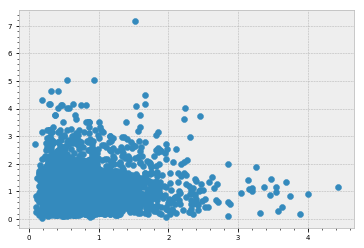

In [27]:
#Minus1
mergedDropped = mergedMinus1.dropna(subset=['Duration','TimeProp','DurationEDU','TimePropEDU','TempoEDU'])


loc, scale = scipy.stats.norm.fit(mergedDropped['TimeProp'])
norm1 = scipy.stats.norm(loc=loc, scale=scale)
loc, scale = scipy.stats.norm.fit(mergedDropped['TimePropEDU'])
norm2 = scipy.stats.norm(loc=loc, scale=scale)

print(scipy.stats.kstest(mergedDropped['TimeProp'], norm1.cdf))
print(scipy.stats.kstest(mergedDropped['TimePropEDU'], norm2.cdf))



print(scipy.stats.spearmanr(mergedDropped['Duration'], mergedDropped['DurationEDU']))
print(scipy.stats.spearmanr(mergedDropped['Duration'], mergedDropped['TempoEDU']))
#
plt.scatter(mergedDropped['Duration'], mergedDropped['DurationEDU'])

In [12]:
#теперь по группировке Id, Id 2
#EDU
mergedDropped = merged.dropna(subset=['Duration','TimeProp','DurationEDU','TimePropEDU','TempoEDU'])

groupedBy = mergedDropped.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','C', 4))
g12 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','C', 22))
g13 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','C', 23))

g21 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('01_tell','N', 4))
g22 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','N', 4))
g23 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('01_tell','N', 22))
g24 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','N', 22))
g25 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('01_tell','N', 23))
g26 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','N', 23))

g31 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','R', 4))
g32 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('03_retell','R', 4))
g33 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','R', 22))
g34 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('03_retell','R', 22))
g35 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('02_conv','R', 23))
g36 = groupedBy[('Duration','DurationEDU','TempoEDU')].get_group(('03_retell','R', 23))

#
print(scipy.stats.spearmanr(g11['Duration'], g11['DurationEDU']))
print(scipy.stats.spearmanr(g11['Duration'], g11['TempoEDU']))
print(scipy.stats.spearmanr(g12['Duration'], g12['DurationEDU']))
print(scipy.stats.spearmanr(g12['Duration'], g12['TempoEDU']))
print(scipy.stats.spearmanr(g13['Duration'], g13['DurationEDU']))
print(scipy.stats.spearmanr(g13['Duration'], g13['TempoEDU']))

print(scipy.stats.spearmanr(g21['Duration'], g21['DurationEDU']))
print(scipy.stats.spearmanr(g21['Duration'], g21['TempoEDU']))
print(scipy.stats.spearmanr(g22['Duration'], g22['DurationEDU']))
print(scipy.stats.spearmanr(g22['Duration'], g22['TempoEDU']))
print(scipy.stats.spearmanr(g23['Duration'], g23['DurationEDU']))
print(scipy.stats.spearmanr(g23['Duration'], g23['TempoEDU']))
print(scipy.stats.spearmanr(g24['Duration'], g24['DurationEDU']))
print(scipy.stats.spearmanr(g24['Duration'], g24['TempoEDU']))
print(scipy.stats.spearmanr(g25['Duration'], g25['DurationEDU']))
print(scipy.stats.spearmanr(g25['Duration'], g25['TempoEDU']))
print(scipy.stats.spearmanr(g26['Duration'], g26['DurationEDU']))
print(scipy.stats.spearmanr(g26['Duration'], g26['TempoEDU']))

print(scipy.stats.spearmanr(g31['Duration'], g31['DurationEDU']))
print(scipy.stats.spearmanr(g31['Duration'], g31['TempoEDU']))
print(scipy.stats.spearmanr(g32['Duration'], g32['DurationEDU']))
print(scipy.stats.spearmanr(g32['Duration'], g32['TempoEDU']))
print(scipy.stats.spearmanr(g33['Duration'], g33['DurationEDU']))
print(scipy.stats.spearmanr(g33['Duration'], g33['TempoEDU']))
print(scipy.stats.spearmanr(g34['Duration'], g34['DurationEDU']))
print(scipy.stats.spearmanr(g34['Duration'], g34['TempoEDU']))
print(scipy.stats.spearmanr(g35['Duration'], g35['DurationEDU']))
print(scipy.stats.spearmanr(g35['Duration'], g35['TempoEDU']))
print(scipy.stats.spearmanr(g36['Duration'], g36['DurationEDU']))
print(scipy.stats.spearmanr(g36['Duration'], g36['TempoEDU']))

SpearmanrResult(correlation=0.014823639769092217, pvalue=0.8830298359433666)
SpearmanrResult(correlation=-0.03532448014929874, pvalue=0.7258154906688274)
SpearmanrResult(correlation=-0.008908604660203916, pvalue=0.9073931958327808)
SpearmanrResult(correlation=0.05084104396325056, pvalue=0.5065037875524254)
SpearmanrResult(correlation=-0.10125207073530479, pvalue=0.20124191318850715)
SpearmanrResult(correlation=-0.035300038830432506, pvalue=0.6566407581995493)
SpearmanrResult(correlation=-0.10514433013320314, pvalue=0.04213096426306842)
SpearmanrResult(correlation=0.05014967565789308, pvalue=0.33343865705310916)
SpearmanrResult(correlation=-0.07782266707070326, pvalue=0.40427602694146725)
SpearmanrResult(correlation=0.1527666914135654, pvalue=0.1001039782453333)
SpearmanrResult(correlation=0.10587733570773483, pvalue=0.1356615213240495)
SpearmanrResult(correlation=-0.017438875057626913, pvalue=0.8063823074356204)
SpearmanrResult(correlation=-0.16151920769969708, pvalue=0.041953090839122

In [9]:
#dataGesture.filter(('EventId','TimeProp','Interval','Id','Id 2'))[1330:1400]
#rint(refs.filter(('EventId','RefId','Id','Id 2'))[2570:2600])
#rint(dataGesture.filter(('EventId','RefId','DurationEDU','TimePropEDU','Interval','Id','Id 2'))[1330:1800])
#result = dataGesture.merge(refs, how='left', on=('Id', 'Id 2', 'EventId'), suffixes=('','Ref'))
#print(result.filter(('EventId','RefId','DurationEDU','TimePropEDU','Interval','Id','Id 2'))[1330:1800])
#print(dataGesture.dtypes)
print(refs.loc[2576,'EventId'])==print(dataGesture.loc[5650,'EventId'])
#refs.loc[2576,'EventId'].strip()
#str(dataGesture.loc[5650,'EventId'])

N-mGe001
N-mGe001


True

In [33]:
#FRG CORRELATIONS
GeStrokeRefd = dataGeStroke.merge(refs, how='left', on=('Id', 'Id 2', 'EventId'), suffixes=('','Ref'))

merged = GeStrokeRefd.merge(dataFRG, how='left', left_on=('Id', 'Id 2', 'RefId'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','FRG'))
mergedMinus1 = GeStrokeRefd.merge(dataFRG, how='left', left_on=('Id', 'Id 2', 'RefIdMinus1'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','FRG'))
mergedPlus1 = GeStrokeRefd.merge(dataFRG, how='left', left_on=('Id', 'Id 2', 'RefIdPlus1'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','FRG'))
mergedPlus2 = GeStrokeRefd.merge(dataFRG, how='left', left_on=('Id', 'Id 2', 'RefIdPlus2'), right_on=('Id', 'Id 2', 'EventId'), suffixes=('','FRG'))

#
mergedDropped = mergedPlus2.dropna(subset=['Duration','TimeProp','DurationFRG','TimePropFRG','TempoFRG'])

print(scipy.stats.spearmanr(mergedDropped['Duration'], mergedDropped['DurationFRG']))
print(scipy.stats.spearmanr(mergedDropped['Duration'], mergedDropped['TempoFRG']))
print('----')


groupedBy = mergedDropped.groupby(['Interval', 'Id', 'Id 2'])
g11 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','C', 4))
g12 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','C', 22))
g13 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','C', 23))

g21 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('01_tell','N', 4))
g22 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','N', 4))
g23 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('01_tell','N', 22))
g24 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','N', 22))
g25 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('01_tell','N', 23))
g26 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','N', 23))

g31 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','R', 4))
g32 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('03_retell','R', 4))
g33 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','R', 22))
g34 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('03_retell','R', 22))
g35 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('02_conv','R', 23))
g36 = groupedBy[('Duration','DurationFRG','TempoFRG')].get_group(('03_retell','R', 23))

#
print(scipy.stats.spearmanr(g11['Duration'], g11['DurationFRG']))
print(scipy.stats.spearmanr(g11['Duration'], g11['TempoFRG']))
print(scipy.stats.spearmanr(g12['Duration'], g12['DurationFRG']))
print(scipy.stats.spearmanr(g12['Duration'], g12['TempoFRG']))
print(scipy.stats.spearmanr(g13['Duration'], g13['DurationFRG']))
print(scipy.stats.spearmanr(g13['Duration'], g13['TempoFRG']))

print(scipy.stats.spearmanr(g21['Duration'], g21['DurationFRG']))
print(scipy.stats.spearmanr(g21['Duration'], g21['TempoFRG']))
print(scipy.stats.spearmanr(g22['Duration'], g22['DurationFRG']))
print(scipy.stats.spearmanr(g22['Duration'], g22['TempoFRG']))
print(scipy.stats.spearmanr(g23['Duration'], g23['DurationFRG']))
print(scipy.stats.spearmanr(g23['Duration'], g23['TempoFRG']))
print(scipy.stats.spearmanr(g24['Duration'], g24['DurationFRG']))
print(scipy.stats.spearmanr(g24['Duration'], g24['TempoFRG']))
print(scipy.stats.spearmanr(g25['Duration'], g25['DurationFRG']))
print(scipy.stats.spearmanr(g25['Duration'], g25['TempoFRG']))
print(scipy.stats.spearmanr(g26['Duration'], g26['DurationFRG']))
print(scipy.stats.spearmanr(g26['Duration'], g26['TempoFRG']))

print(scipy.stats.spearmanr(g31['Duration'], g31['DurationFRG']))
print(scipy.stats.spearmanr(g31['Duration'], g31['TempoFRG']))
print(scipy.stats.spearmanr(g32['Duration'], g32['DurationFRG']))
print(scipy.stats.spearmanr(g32['Duration'], g32['TempoFRG']))
print(scipy.stats.spearmanr(g33['Duration'], g33['DurationFRG']))
print(scipy.stats.spearmanr(g33['Duration'], g33['TempoFRG']))
print(scipy.stats.spearmanr(g34['Duration'], g34['DurationFRG']))
print(scipy.stats.spearmanr(g34['Duration'], g34['TempoFRG']))
print(scipy.stats.spearmanr(g35['Duration'], g35['DurationFRG']))
print(scipy.stats.spearmanr(g35['Duration'], g35['TempoFRG']))
print(scipy.stats.spearmanr(g36['Duration'], g36['DurationFRG']))
print(scipy.stats.spearmanr(g36['Duration'], g36['TempoFRG']))

SpearmanrResult(correlation=0.009282728425827471, pvalue=0.6367195433913744)
SpearmanrResult(correlation=0.012621218240818738, pvalue=0.520769866005174)
----
SpearmanrResult(correlation=0.0635913380530966, pvalue=0.5338924976891941)
SpearmanrResult(correlation=0.026563547108498255, pvalue=0.7951434018849873)
SpearmanrResult(correlation=-0.06816981932388708, pvalue=0.3728374343805857)
SpearmanrResult(correlation=0.013838600630167891, pvalue=0.8565971949998112)
SpearmanrResult(correlation=0.0964916289478673, pvalue=0.2277917647656117)
SpearmanrResult(correlation=0.11741873896178581, pvalue=0.14175175485398372)
SpearmanrResult(correlation=-0.022780904033643978, pvalue=0.6661833438616064)
SpearmanrResult(correlation=0.002589369049757375, pvalue=0.9608974053190462)
SpearmanrResult(correlation=0.05156891887107868, pvalue=0.5841464537005052)
SpearmanrResult(correlation=0.07143280228750828, pvalue=0.4480721590089599)
SpearmanrResult(correlation=-0.0635709236948868, pvalue=0.37605093689399105)


In [34]:
#PMeasure
g1 = dataGesture['PMeasure']
g2 = dataGeStroke['PMeasure']

groupedBy = dataGesture.groupby(['Id'])
g11 = groupedBy[('PMeasure')].get_group(('C'))
g12 = groupedBy[('PMeasure')].get_group(('N'))
g13 = groupedBy[('PMeasure')].get_group(('R'))
groupedBy = dataGeStroke.groupby(['Id'])
g21 = groupedBy[('PMeasure')].get_group(('C'))
g22 = groupedBy[('PMeasure')].get_group(('N'))
g23 = groupedBy[('PMeasure')].get_group(('R'))


print(scipy.stats.ttest_ind(g1, g2, equal_var=False))
print('----')
print(scipy.stats.ttest_ind(g11, g21, equal_var=False))
print(scipy.stats.ttest_ind(g12, g22, equal_var=False))
print(scipy.stats.ttest_ind(g13, g23, equal_var=False))

Ttest_indResult(statistic=-6.198595076428995, pvalue=6.120822235086972e-10)
----
Ttest_indResult(statistic=-3.582913936412865, pvalue=0.00035842158228743923)
Ttest_indResult(statistic=-5.400932782982371, pvalue=7.249226646691272e-08)
Ttest_indResult(statistic=-2.0210019298987407, pvalue=0.04341405589015894)


(array([ 1.16116116,  0.12012012,  0.14014014,  0.12012012,  0.28028028,
         0.2002002 ,  0.16016016,  0.26026026,  0.48048048,  0.32032032,
         0.86086086,  0.42042042,  0.5005005 ,  0.66066066,  0.78078078,
         0.74074074,  0.52052052,  0.72072072,  0.86086086, 10.69069069]),
 array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
        0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]),
 <a list of 20 Patch objects>)

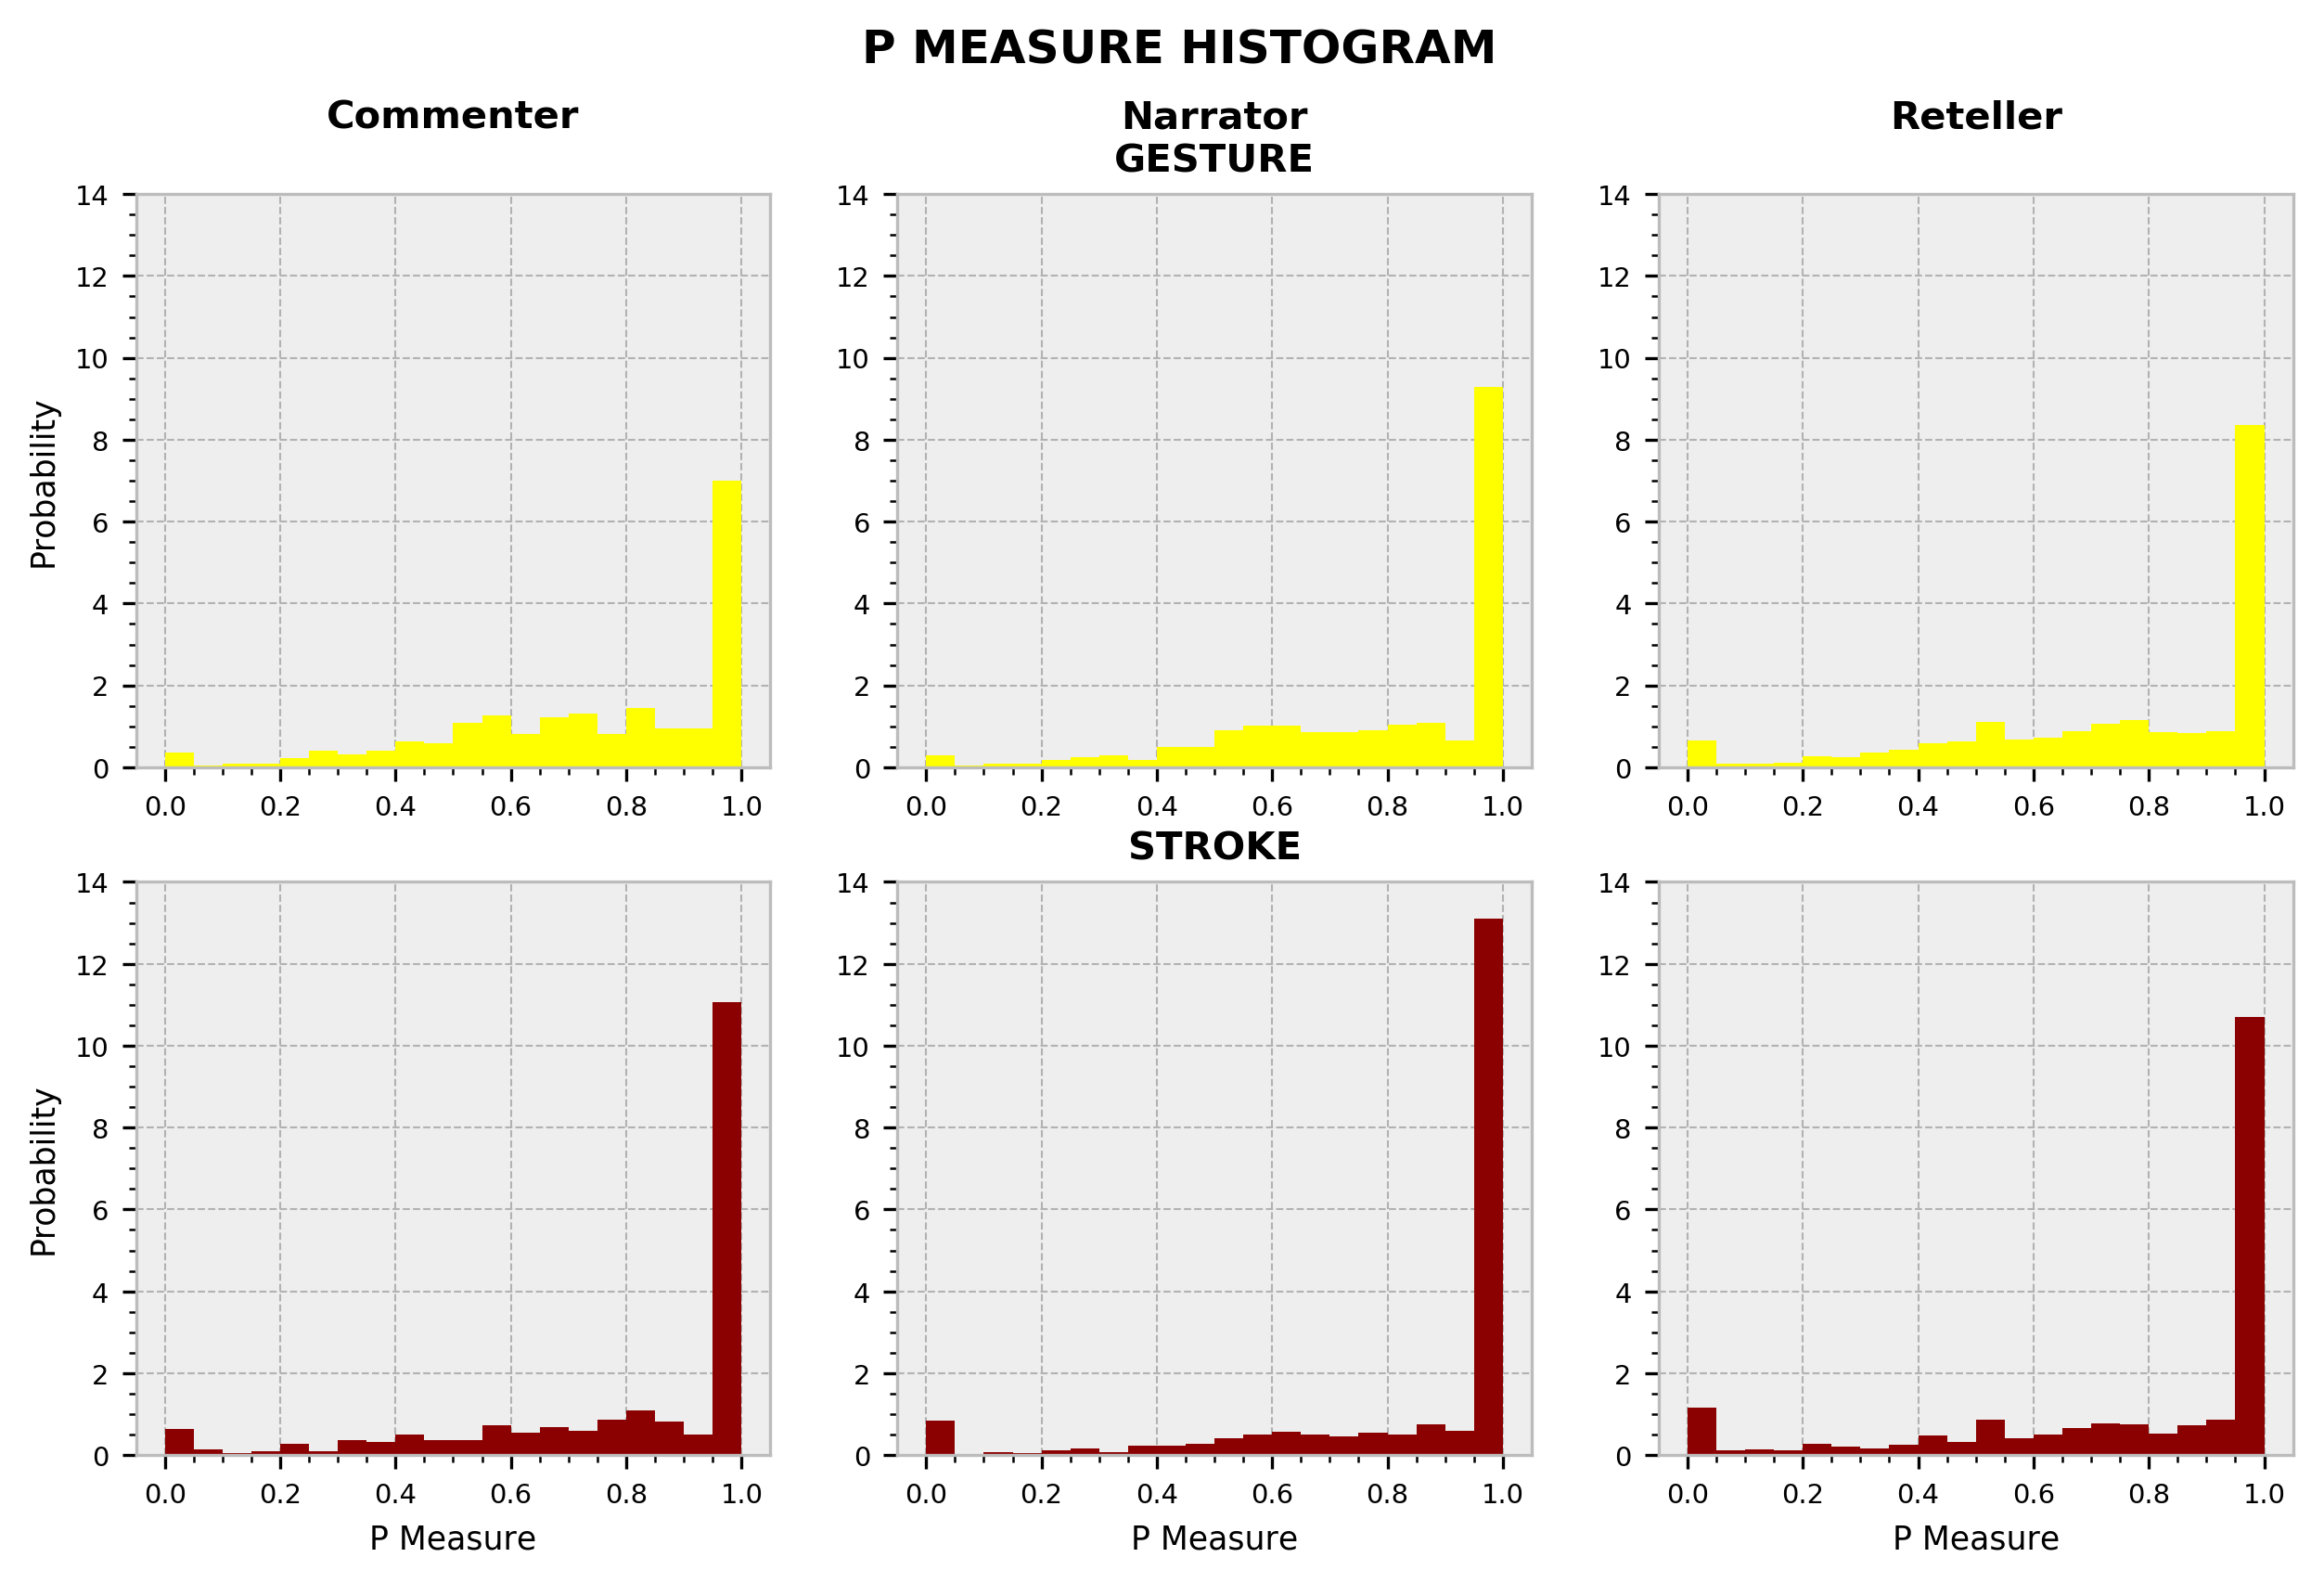

In [49]:
plt.figure(figsize=(10, 6))
plt.suptitle('P MEASURE HISTOGRAM')
plt.subplot(231)
plt.title('Commenter\n')
plt.axis(ymax=14)
plt.ylabel('Probability')
plt.hist(g11, density=True, cumulative=False, orientation='vertical', rwidth=2, label='Gesture', color='yellow')
plt.subplot(232)
plt.title('Narrator\nGESTURE')
plt.axis(ymax=14)
plt.hist(g12, density=True, cumulative=False, orientation='vertical', rwidth=2, label='Gesture', color='yellow')
plt.subplot(233)
plt.title('Reteller\n')
plt.axis(ymax=14)
plt.hist(g13, density=True, cumulative=False, orientation='vertical', rwidth=2, label='Gesture', color='yellow')
#
plt.subplot(234)
plt.title('\n')
plt.xlabel('P Measure')
plt.ylabel('Probability')
plt.axis(ymax=14)
plt.hist(g21, density=True, cumulative=False, orientation='vertical', rwidth=2, label='Stroke', color='darkred')
plt.subplot(235)
plt.title('\nSTROKE')
plt.xlabel('P Measure')
plt.axis(ymax=14)
plt.hist(g22, density=True, cumulative=False, orientation='vertical', rwidth=2, label='Stroke', color='darkred')
plt.subplot(236)
plt.title('\n')
plt.xlabel('P Measure')
plt.axis(ymax=14)
plt.hist(g23, density=True, cumulative=False, orientation='vertical', rwidth=2, label='Stroke', color='darkred')